# EE5907 Pattern Recognition CA1       
## Student name: Zhu Yanghui
## Student ID: A0280110B

### The libraries need to used in this assigment are numpy and matplotlib. Numpy is used to do matrix calculation and matplotlib is used to plot the graphs
### In the following markdowns, the questions and some instructions in the assignment will be represent in pink color which is easy to tell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1: MAP
### <font color="#dd00dd">1. Generate the random data point for xn and tn for y=sin(x^2+1)
</font><br />

In [2]:
def generate_data():
    xn=np.linspace(0,1,50)
    tn=np.sin(xn*xn+1)
    return xn,tn

xn,tn=generate_data()

### <font color="#dd00dd">2. Add the noise to the original data and compare those two in graph (tn_noise is the data added with noise)
</font><br />
### <font color="#dd00dd">3. Show the original curve line and the noisy data.

</font><br />

399.99999999999994


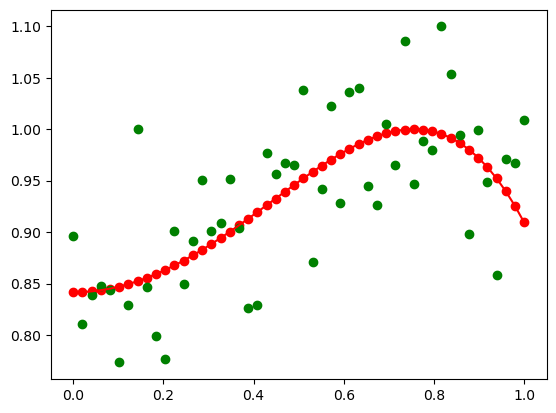

In [3]:
def add_noise(t,mu,sigma):
    """
    
    :parameters
    
    t: data values
    mu: mean
    sigma:standard deviation 
    
    """
    k=len(t)
    noise=np.random.normal(mu,sigma,size=k)
    t_noise=t+noise
    return t_noise

#determine the noise parameter, Beta and Alpha
Alpha=0.4
noise_sigma=0.05
Beta=np.power(noise_sigma,-2) 
print(Beta)
tn_noise=add_noise(tn,0,noise_sigma)
plt.plot(xn,tn,'r') #original curve in red line
plt.scatter(xn,tn,color='r') #original data points in red
plt.scatter(xn,tn_noise,color='g') # data points with noise in green
plt.show()

### <font color="#dd00dd">4. Fit the generated noisy data using MAP
</font><br />
### <font color="#dd00dd">5. Compute and display the total absolute error value (between the predicted and the correct ones) of using the computed w.
</font><br />

### <font color="#dd00dd"> 6. Display the estimated values of w
</font><br />

error = 0.07858069960037828
W is [ 0.83916514 -0.01262344  0.83315369 -0.71456519]


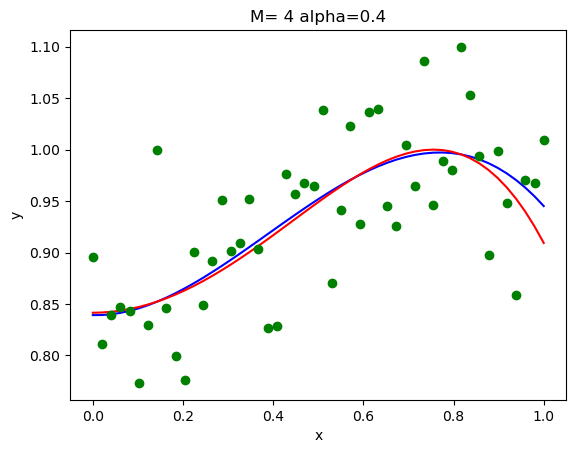

In [4]:
## get the matrix X for mode complexity m
def get_matrix_X(x,m):
    n=len(x) #the number of the data points
    X=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            X[[i],[j]]=x[i]**(j)
    return X
    pass

X=get_matrix_X(xn,4)


def get_MAP_fitting(X,tn,alpha,beta):
    m=X.shape[1]
    tem=np.dot(beta*(X.T),X)+alpha*np.identity(m) #Beta*X.T*X + alpha*I
    tem2=np.linalg.inv(tem)
    w=beta*np.dot(tem2,np.dot(X.T,tn))
    return w

w=get_MAP_fitting(X,tn,alpha=0.4,beta=Beta)


def plot_MAP_curve(X,w):
    m=X.shape[1]
    yn=np.dot(X,w)
    plt.plot(xn,yn,'b')
    plt.plot(xn,tn,'r') #original curve
    plt.plot(xn,tn_noise,'go') # data points with noise
    plt.title("M= "+str(m)+" alpha="+str(Alpha))
    plt.xlabel("x")
    plt.ylabel("y")
    print("W is",w.T)
    plt.show()
    pass
# Try the function with M=4 and alpha=0.4
X=get_matrix_X(xn,4)
w=get_MAP_fitting(X,tn_noise,alpha=Alpha,beta=Beta)
yn=np.dot(X,w)
Error=1/2*np.sum(np.square(yn-tn_noise))
#print(f"w is",w)
print(f"error =",Error)
plot_MAP_curve(X,w)



### <font color="#dd00dd">7. Experiment with your code by changing M and alpha (the coefficient of the regularization/prior term) to various values, and then show the plots. 
</font><br />
### for alpha=0.4, choose different values for M to plot

error= 0.1583649524320849
W is [0.93111629]


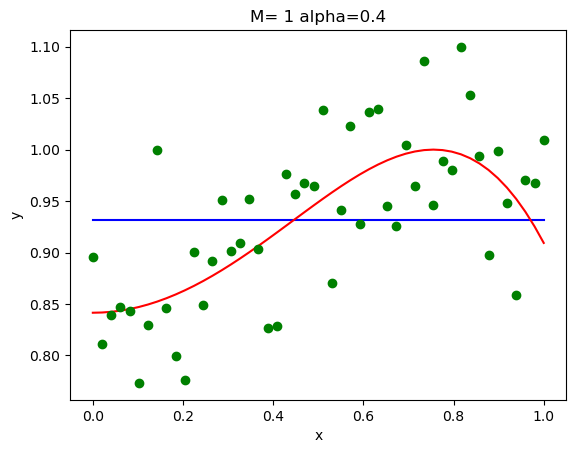

error= 0.0934629773950043
W is [0.84458601 0.17306402]


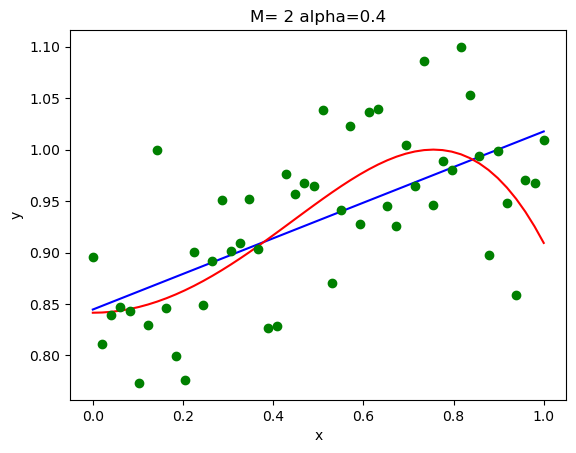

error= 0.08513433535696709
W is [ 0.8064557   0.40673707 -0.23373133]


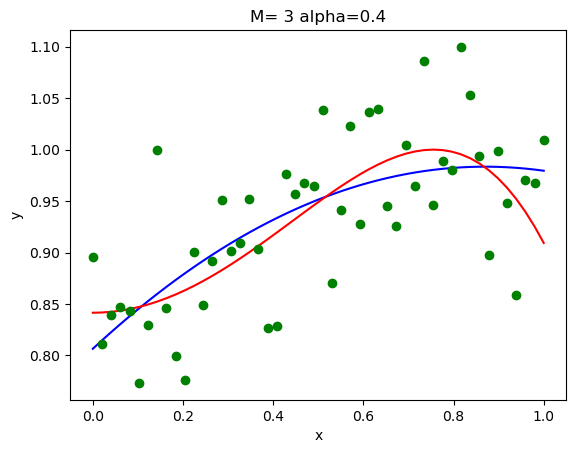

error= 0.07858069960037828
W is [ 0.83916514 -0.01262344  0.83315369 -0.71456519]


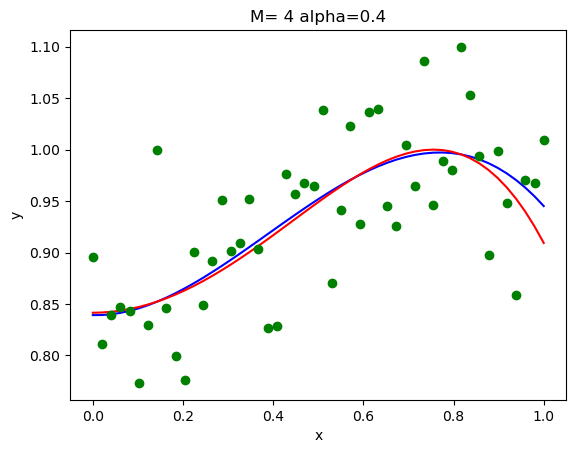

error= 0.07876364041554516
W is [ 0.83851885  0.01610939  0.66259646 -0.40743043 -0.16803604]


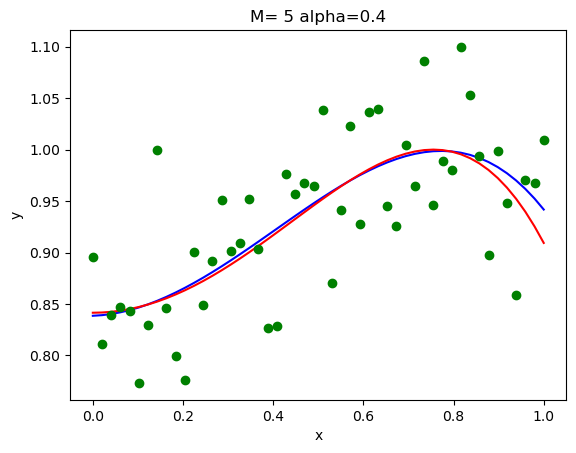

error= 0.07840344253362824
W is [ 0.84046069 -0.02059957  0.76799903 -0.35447504 -0.53146211  0.24394966]


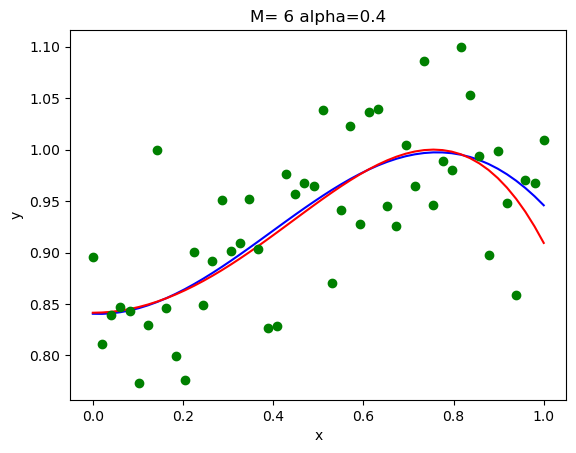

error= 0.07790772186344806
W is [ 0.84284883 -0.04929653  0.77534246 -0.15090123 -0.56566014 -0.34674394
  0.44667362]


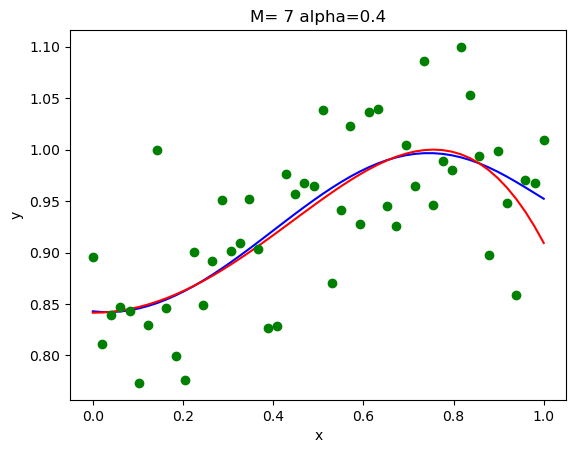

error= 0.07747591851494214
W is [ 0.84402381 -0.05076947  0.69329581  0.01988715 -0.41148105 -0.49186829
 -0.17715594  0.53278163]


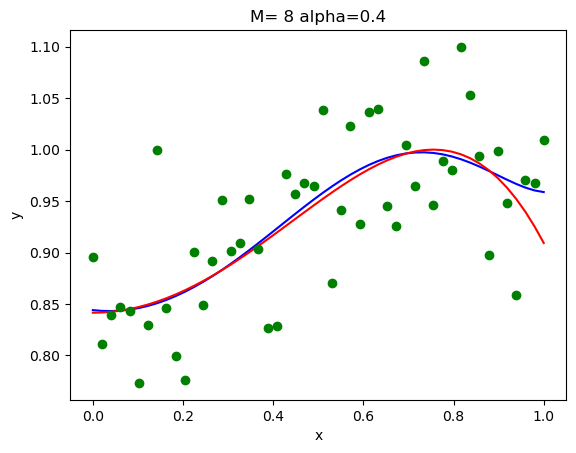

error= 0.07707728052182843
W is [ 0.84407447 -0.03504482  0.58600507  0.1118216  -0.23389878 -0.42958306
 -0.39212196 -0.06185899  0.57544243]


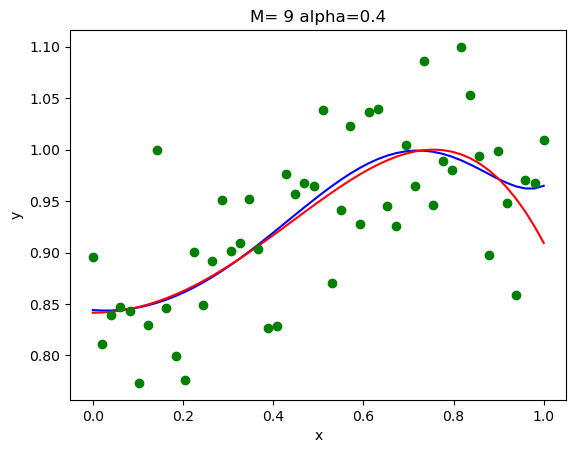

error= 0.07667758704324333
W is [ 0.84342922 -0.01245478  0.48881012  0.13727909 -0.09397144 -0.29957924
 -0.40259371 -0.31272233  0.01929895  0.60317344]


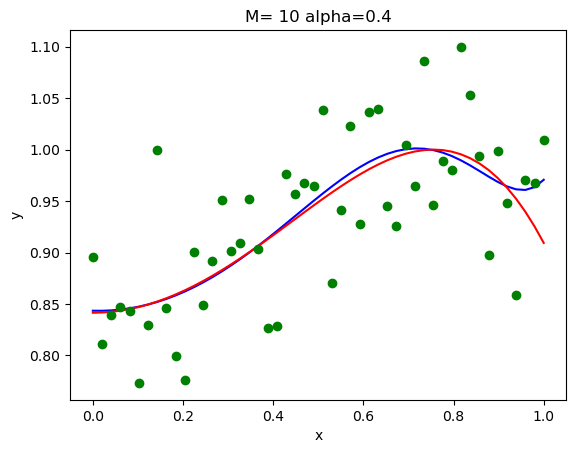

In [5]:
for i in range(10):
    X=get_matrix_X(xn,i+1)
    w=get_MAP_fitting(X,tn_noise,alpha=Alpha,beta=Beta)
    yn=np.dot(X,w)
    Error=1/2*np.sum(np.square(yn-tn_noise))
    print(f"error=",Error)
    plot_MAP_curve(X,w)

### When M=10, plot the fitting for different alpha values

error= 0.1415729832374932
W is [ 8.80410035e-01 -2.24217486e+00  3.17860929e+01 -1.85094456e+02
  5.28007555e+02 -6.36281586e+02 -1.58883429e+02  1.23937960e+03
 -1.19495022e+03  3.78422302e+02]


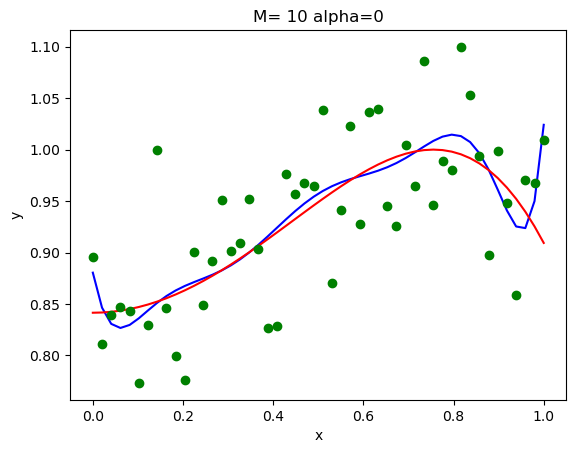

error= 0.15279555503034475
W is [ 0.84408406 -0.01164631  0.49019334 -0.02056568  0.16347879 -0.08617237
 -0.53606712 -0.69891996 -0.22435711  1.05562648]


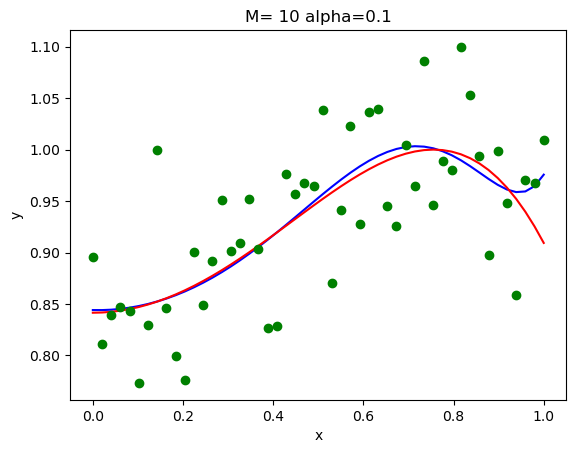

error= 0.15389710609128376
W is [ 0.84040217  0.01660944  0.45441161  0.11965965 -0.14594394 -0.29542205
 -0.31330979 -0.19387134  0.05724338  0.42618867]


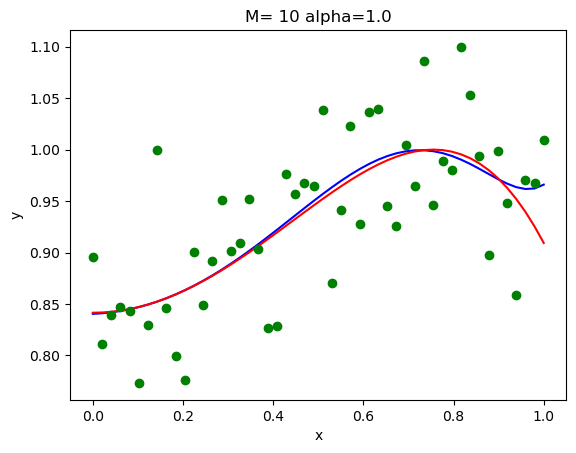

In [6]:
X=get_matrix_X(xn,10)

#alpha=0
Alpha=0
w=get_MAP_fitting(X,tn_noise,alpha=Alpha,beta=Beta)
yn=np.dot(X,w)
Error=np.sum(np.square(yn-tn_noise))
print(f"error=",Error)
plot_MAP_curve(X,w)

#alpha=0.1
Alpha=0.1
w=get_MAP_fitting(X,tn_noise,alpha=Alpha,beta=Beta)
yn=np.dot(X,w)
Error=np.sum(np.square(yn-tn_noise))
print(f"error=",Error)
plot_MAP_curve(X,w)

#alpha=1
Alpha=1.0
w=get_MAP_fitting(X,tn_noise,alpha=Alpha,beta=Beta)
yn=np.dot(X,w)
Error=np.sum(np.square(yn-tn_noise))
print(f"error=",Error)
plot_MAP_curve(X,w)


### <font color="#dd00dd">8. From the experiment in #7, discuss how M and alpha influence on the fitting accuracy
</font><br />
### As alpha introduced and increases, the overfitting problem is eased 
### With a proper value of alpha, as the M increases, the overfitting problem did not become more serious, and the shape of the curve appears almost remain the same.

# Part 2 BASIS FUNCTION

### Gaussion basis function

### <font color="#dd00dd">Fit the generated noisy data using the MLE that employs the Gaussian basis functions for y=sin(x^2+1)
</font><br />

In [7]:
[xn,tn]=generate_data()
noise_sigma=0.1
Beta=np.power(noise_sigma,-2) 
tn_noise=add_noise(tn,0,noise_sigma)
print(tn_noise)

[0.75760022 0.71339093 0.89879107 0.81504402 0.96728247 0.70961137
 0.77493778 0.80917142 0.87660116 0.97678708 0.84168139 0.83985103
 0.92699115 0.85408266 0.82620385 0.79747415 1.00324324 0.96136181
 0.77590436 1.10736936 1.22751882 0.6147312  0.91000779 0.96898318
 0.91163697 0.89567456 1.04147842 0.88569393 0.80994755 1.11482654
 0.96018487 1.13886372 1.06857834 1.00205362 0.9483701  0.98696424
 1.09634386 1.06159869 1.09378673 1.02610872 0.86704693 0.93483535
 0.98710975 0.81925927 1.05023544 0.82298997 0.85378506 0.89221191
 1.0862592  0.81099134]


In [8]:
def fi_fun_gauss(x,m,sigma):
    # for each data point x, return the mx1 fi function matrix
    fi_m=np.zeros(m) # the return values is mx1 matrix
    #fi_m[0]=1
    mu=np.linspace(0,1,m) #the deviation of each gaussian function distrubute evenly in the function domain
    for i in range(m):
        fi_m[i]=np.exp(-1*(x-mu[i])**2/(2*(sigma**2)))
        pass
    return fi_m

   
#print(fi_fun_gauss(0.2,3,0.1))
    

def get_fi_gauss(xn,m,sigma):
    n=len(xn) # number of the data points
    fi_nm=np.zeros((n,m))
    for i in range(n):
        fi_nm[i][:]=fi_fun_gauss(xn[i],m,sigma)
    return fi_nm

#print(get_fi_gauss([0.2,0.5,0.7],3,0.1))
    
    
def get_MLE_basis_fitting(fi,tn):
    # by experiment, use linalg.solve gives much accurate answer than using linalg.inv
    # The error created using linalg.inv has significant impact on the plot curve
    tem=np.dot(fi.T,fi)
    tem2=np.linalg.solve(tem, fi.T) 
    w=np.dot(tem2,tn)
    return w

def plot_MLE_gauss_curve(fi,w):
    m=len(w)
    yn=np.dot(fi,w)
    plt.plot(xn,yn,'b')
    plt.plot(xn,tn,'r') #original curve in red line
    plt.scatter(xn,tn,color='r') #original data points in red
    plt.scatter(xn,tn_noise,color='g') # data points with noise in green
    plt.title("M = "+str(m)+" s = "+str(Gauss_sigma))
    Error=1/2*np.sum(np.square(yn-tn_noise))
    print(f"error=",Error)
    plt.show()
    pass



### <font color="#dd00dd">4. Show your results for different values of M that generate overfitting and underfitting curves.
</font><br />

error= 18.319621806599226


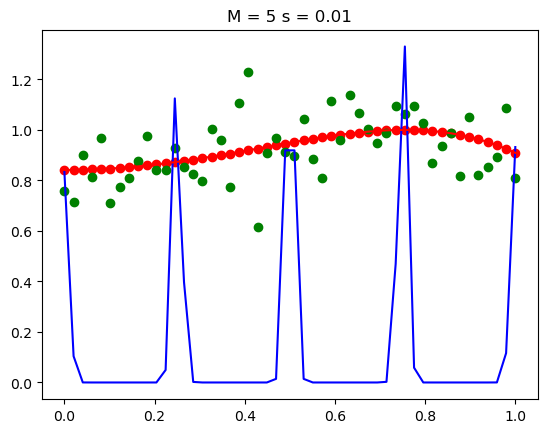

error= 0.3709035484902524


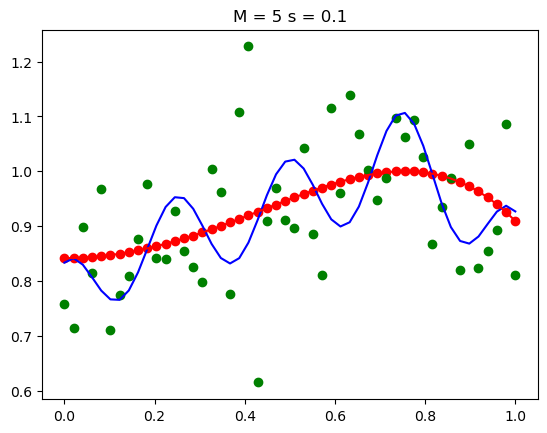

error= 0.2880346602099102


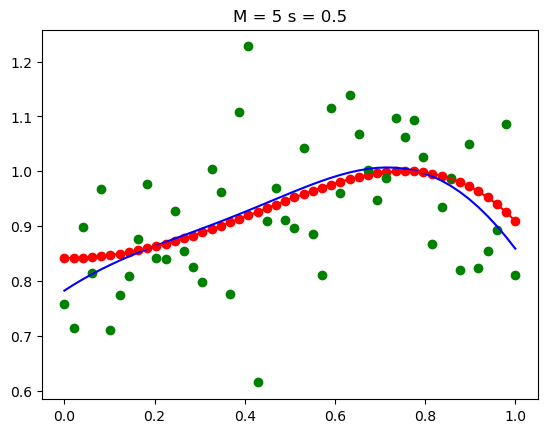

error= 0.29005697589866386


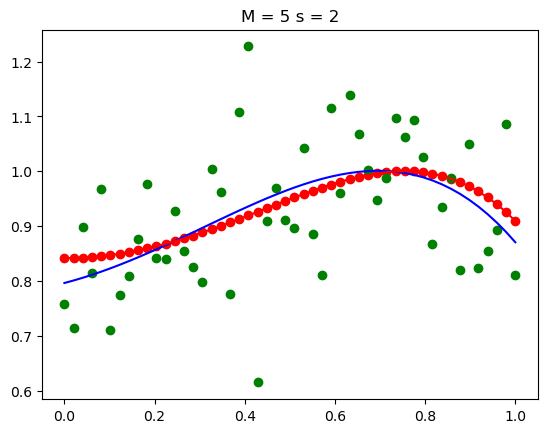

error= 14.7812864844916


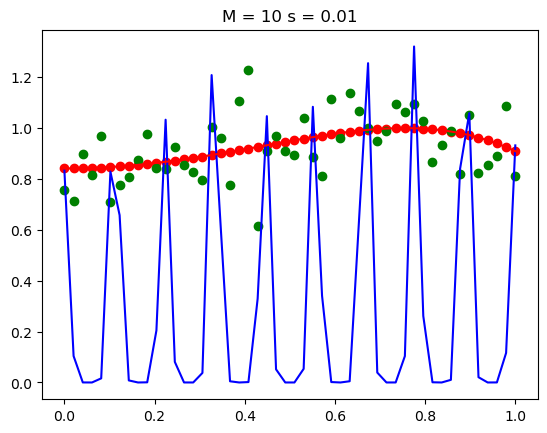

error= 0.27064829425419745


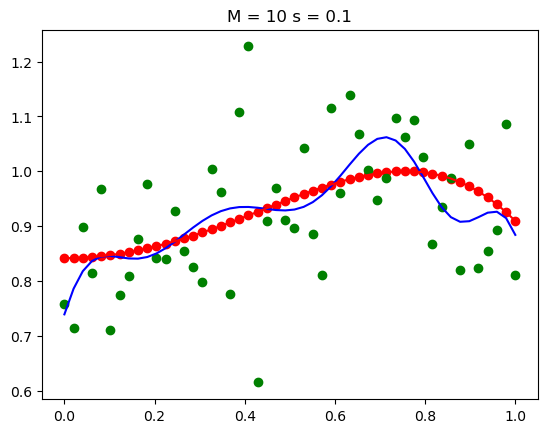

error= 0.27918738754806033


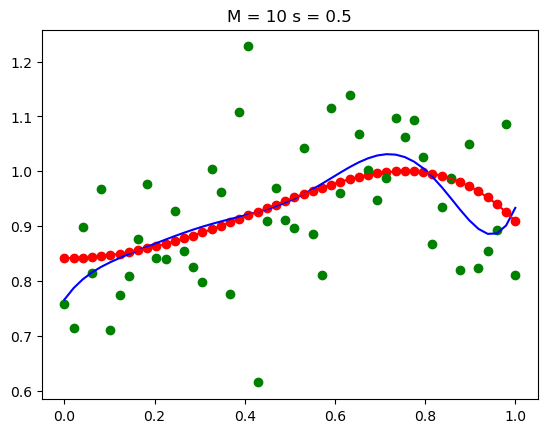

error= 0.2907927162773262


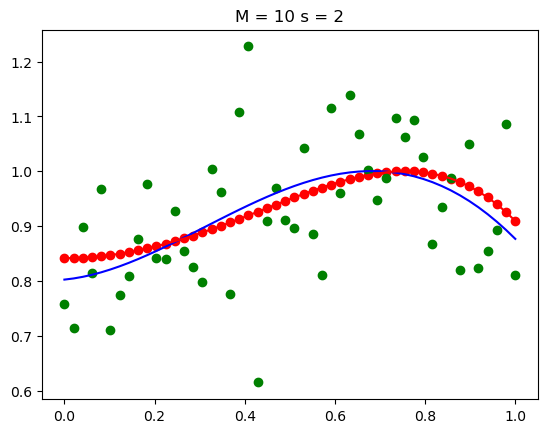

error= 7.1900671344695875


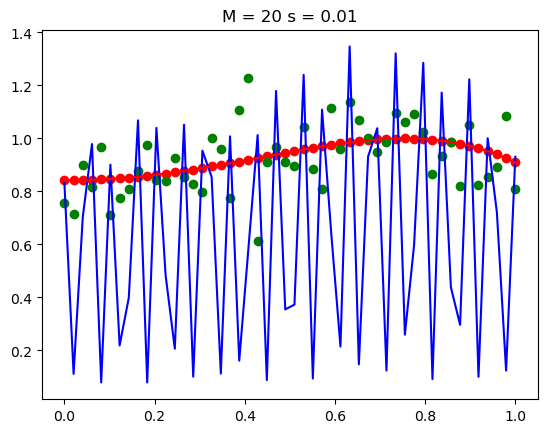

error= 0.19663902530337796


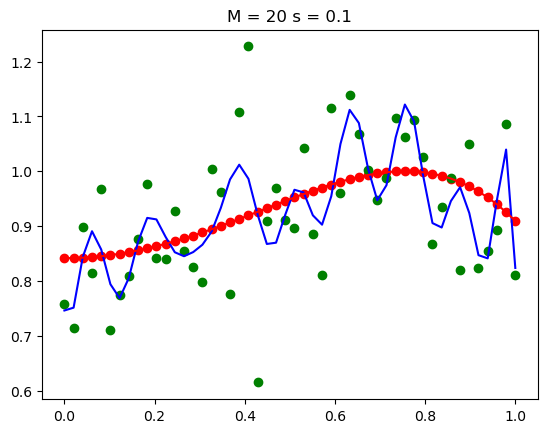

error= 0.27973863695175477


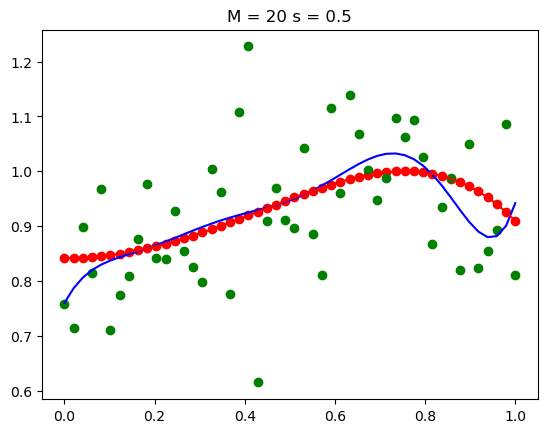

error= 0.2919041786651697


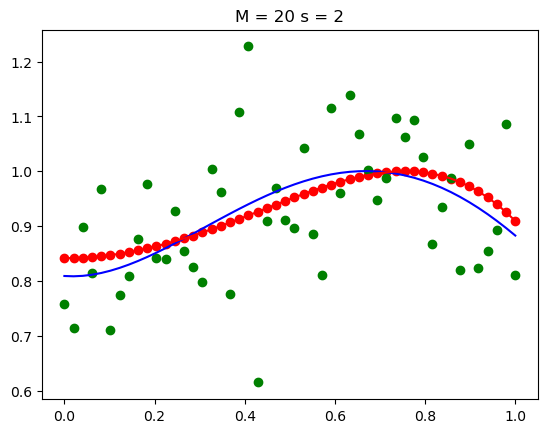

error= 1.4421363423571622e-30


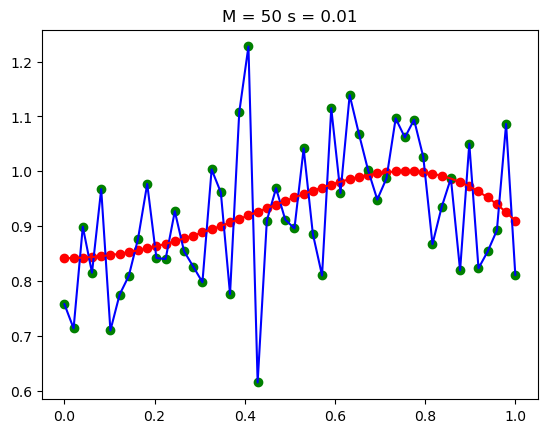

error= 0.1884289760862487


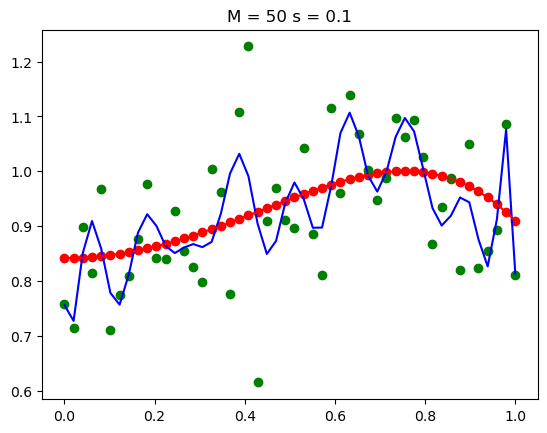

error= 0.2789167247434426


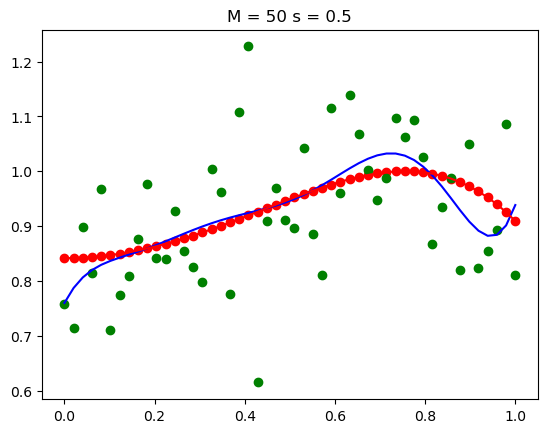

error= 0.2901606763597729


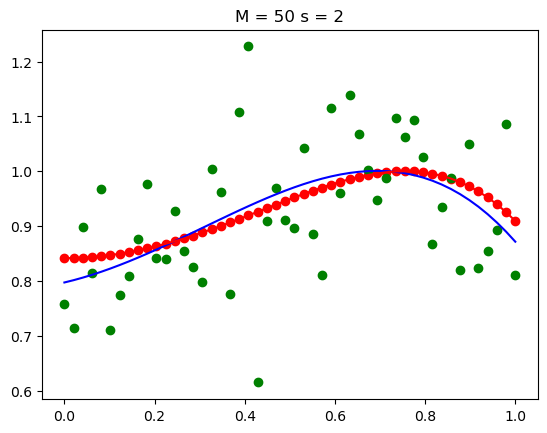

In [9]:
for i in [5,10,20,50]: # model complexity 
    for j in [0.01,0.1,0.5,2]: # deviation of Gaussion basis function
        Gauss_sigma=j
        fi=get_fi_gauss(xn,i,Gauss_sigma)
        w=get_MLE_basis_fitting(fi,tn_noise)
        plot_MLE_gauss_curve(fi,w)

### In conclusion, the model parameters M and s are crucial to the fitting. Generally, if M choose to be large, then the deviation of the basis function s should be small since there exist a large number of basis functions. Similarly, s should be large when M choose to be small.

### <font color="#dd00dd">5. Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves
</font><br />

In [10]:
def fi_fun_sigmoid(x,m,sigma):
    # for each data point x, return the mx1 fi function matrix
    fi_m=np.zeros(m) # the return values is mx1 matrix
    #fi_m[0]=1
    mu=np.linspace(0,1,m) #the deviation of each sigmoid function distrubute evenly in the function domain
    for i in range(m):
        tem=(x-mu[i])/sigma
        fi_m[i]=1/(1+np.exp(-tem))
        pass
    return fi_m

   
#print(fi_fun_gauss(0.2,3,0.1))
    

def get_fi_sigmoid(xn,m,sigma):
    n=len(xn) # number of the data points
    fi_nm=np.zeros((n,m))
    for i in range(n):
        fi_nm[i][:]=fi_fun_sigmoid(xn[i],m,sigma)
    return fi_nm

def plot_MLE_sigmoid_curve(fi,w):
    m=len(w)
    yn=np.dot(fi,w)
    plt.plot(xn,yn,'b')
    plt.plot(xn,tn,'r') #original curve in red line
    plt.scatter(xn,tn,color='r') #original data points in red
    plt.scatter(xn,tn_noise,color='g') # data points with noise in green
    plt.title("M = "+str(m)+" s = "+str(Sigmoid_sigma))
    Error=np.sum(np.square(yn-tn_noise))
    print(f"error=",Error)
    plt.show()
    pass



### <font color="#dd00dd">Change the different value for M and S to plot for Sigmoid basis function fitting
</font><br />

error= 0.6911601301436585


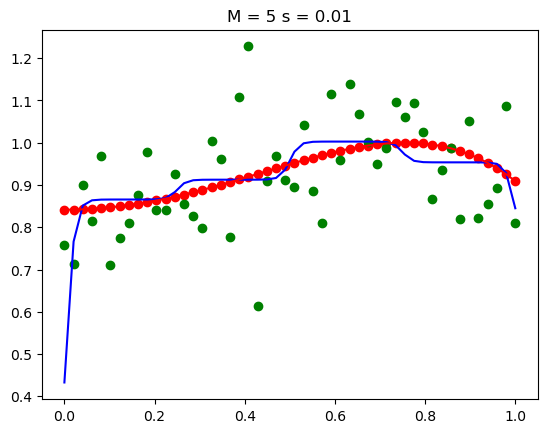

error= 0.6482065866011381


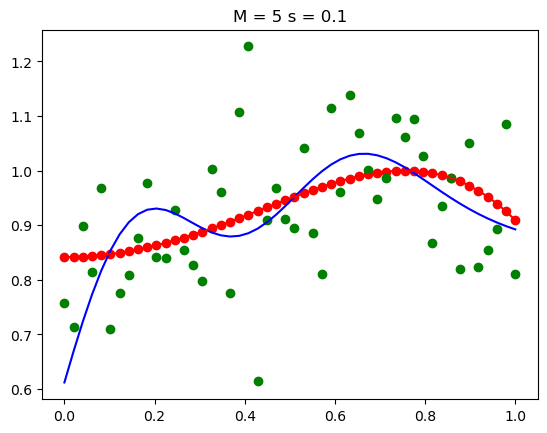

error= 0.5779994924240819


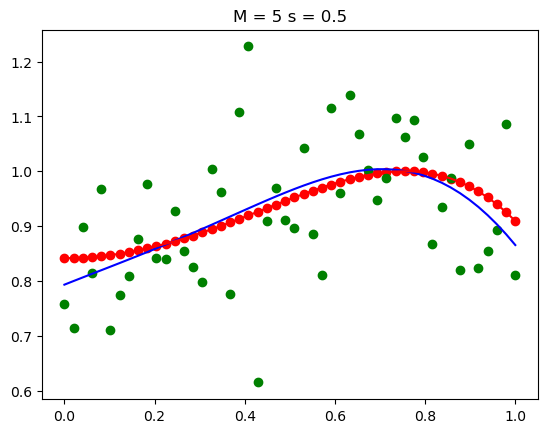

error= 0.5803403324945332


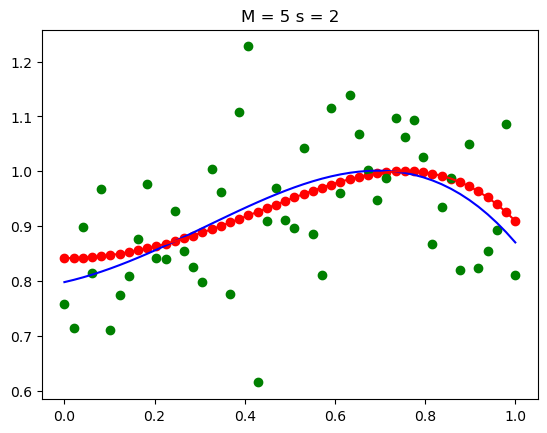

error= 0.6390846956100402


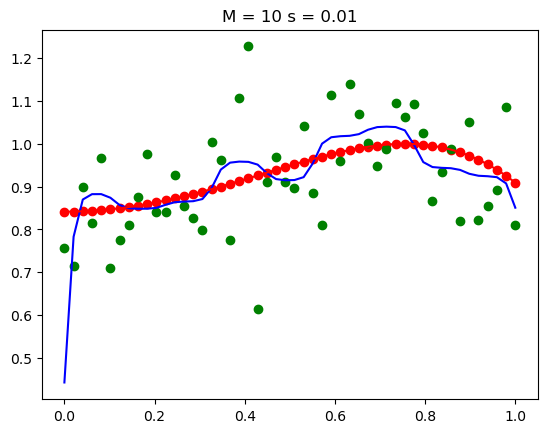

error= 0.5422817921207511


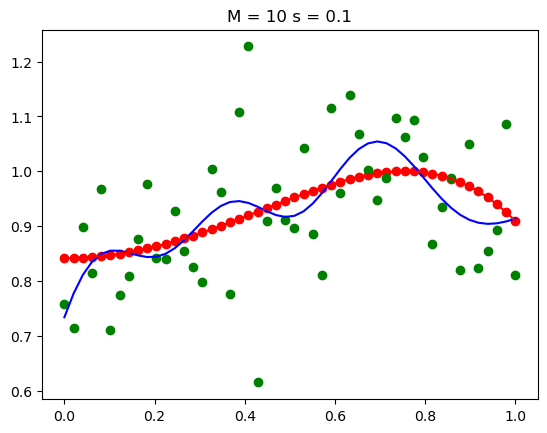

error= 0.560436899505375


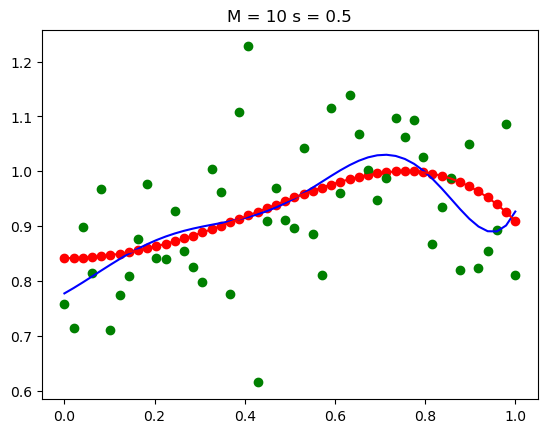

error= 0.5802979533618109


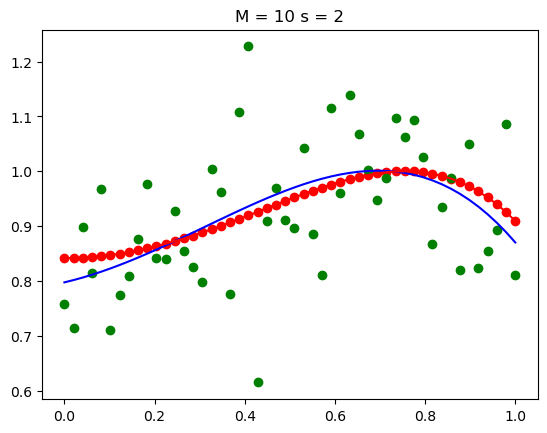

error= 0.4764080792154643


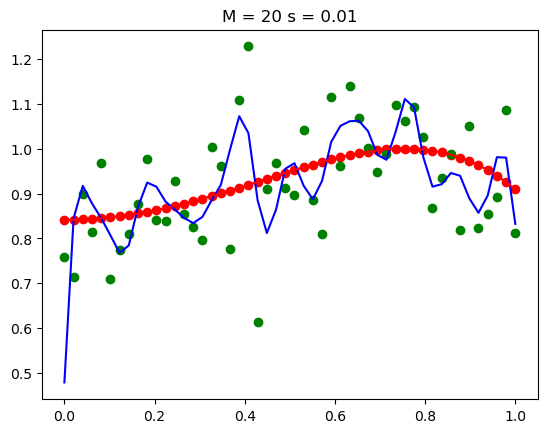

error= 0.41049679176725995


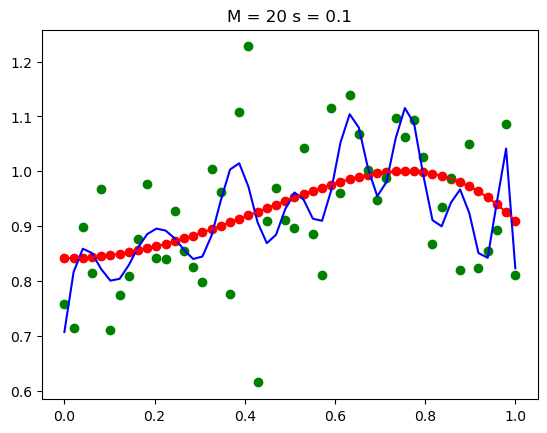

error= 0.5604672344835332


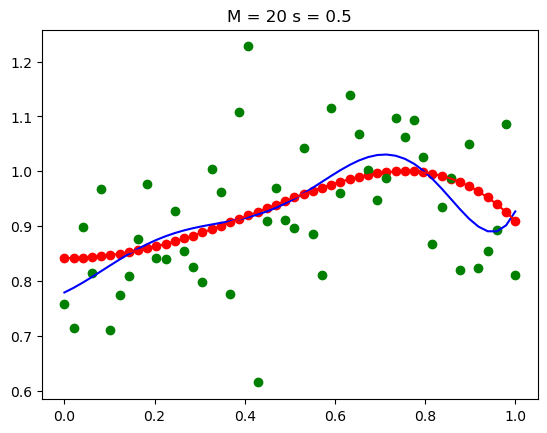

error= 0.580213151675055


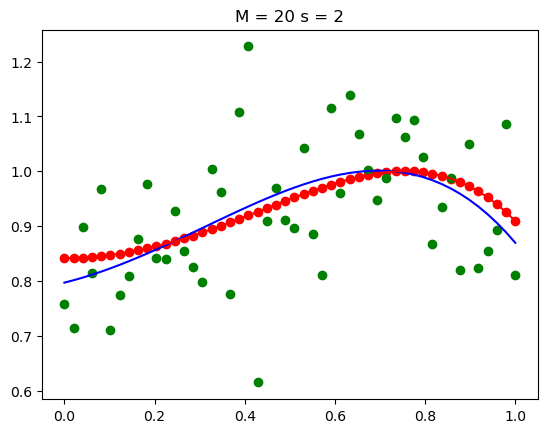

error= 5.56650278304694e-20


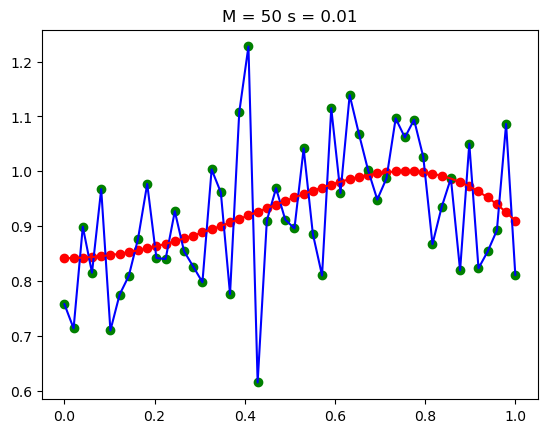

error= 0.37738008877235946


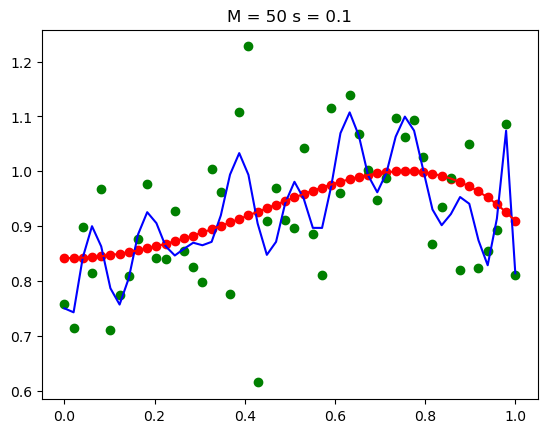

error= 0.5607027231759478


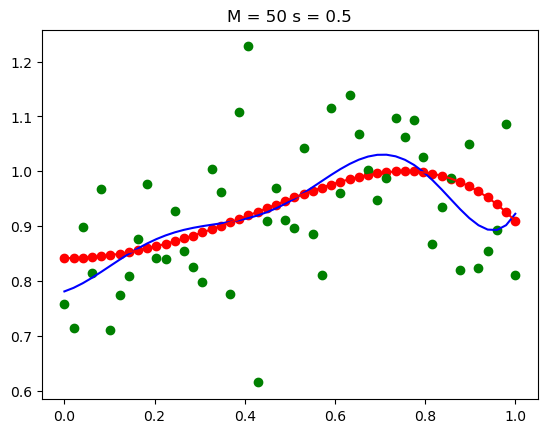

error= 0.5802928016991431


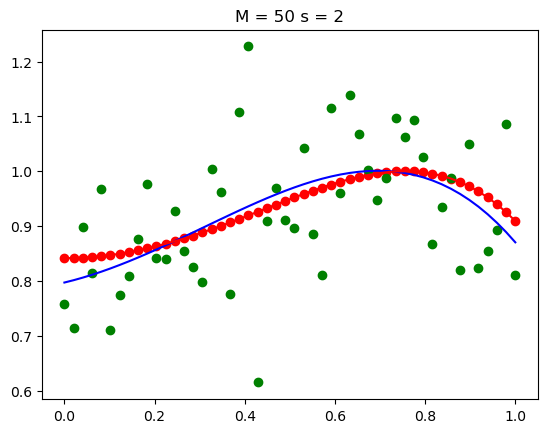

In [11]:
for i in [5,10,20,50]: # Model complexity 
    for j in [0.01,0.1,0.5,2]: # deviation of sigmoid function
        Sigmoid_sigma=j
        fi=get_fi_sigmoid(xn,i,Sigmoid_sigma)
        w=get_MLE_basis_fitting(fi,tn_noise)
        plot_MLE_sigmoid_curve(fi,w)
        pass
    

### Same as the Gaussion basis function, if M choose to be large, then the deviation of the basis function s should be small since there exist a large number of basis functions. Similarly, s should be large when M choose to be small.

### <font color="#dd00dd">6. Change the original curve function to y=0.4345x^3-5.607x^2+16.78x-10.61
</font><br />

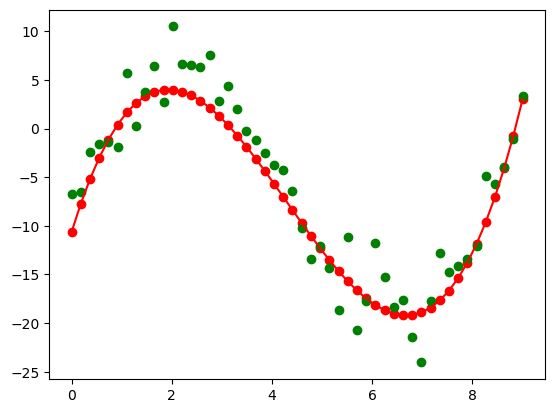

In [12]:
xn=np.linspace(0,9,50)
tn=0.4345*np.power(xn,3)-5.607*np.power(xn,2)+16.78*np.power(xn,1)-10.61
tn_noise=add_noise(tn,0,3)
plt.plot(xn,tn,'r') #original curve in red line
plt.scatter(xn,tn,color='r') #original data points in red
plt.scatter(xn,tn_noise,color='g') # data points with noise in green
plt.show()

### <font color="#dd00dd">7. Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot.
</font><br />
### Use sigmoid basis function

error= 1028.3262504629363


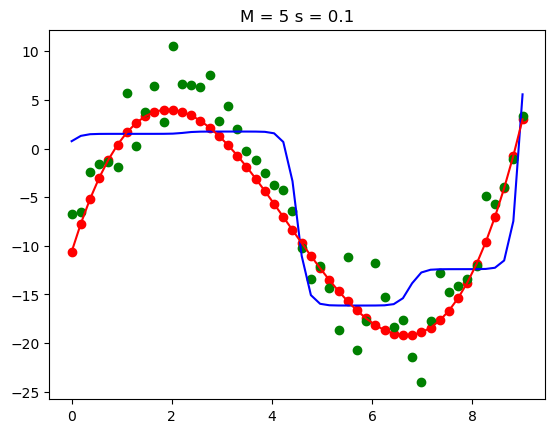

error= 522.7004638663074


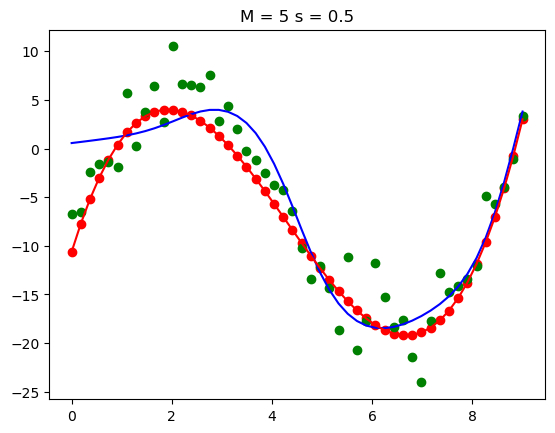

error= 333.8891925867616


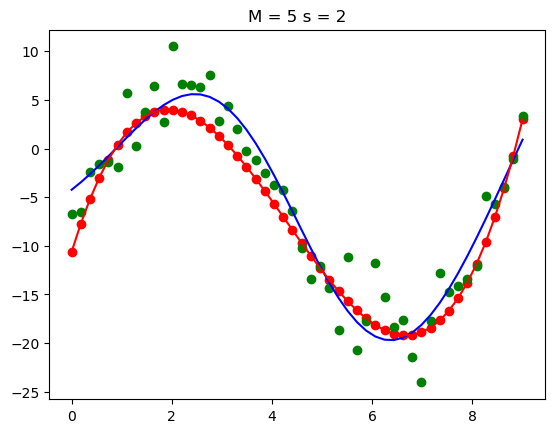

error= 337.9295382620325


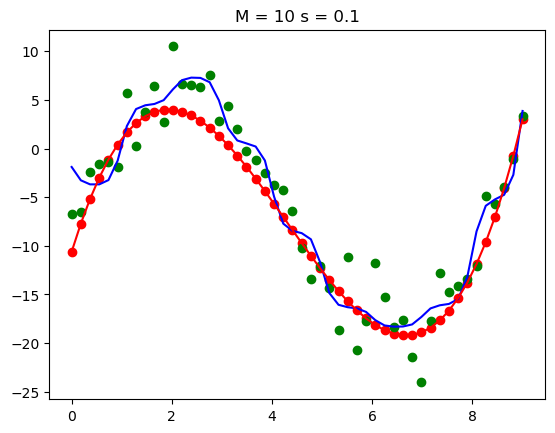

error= 268.83748735908273


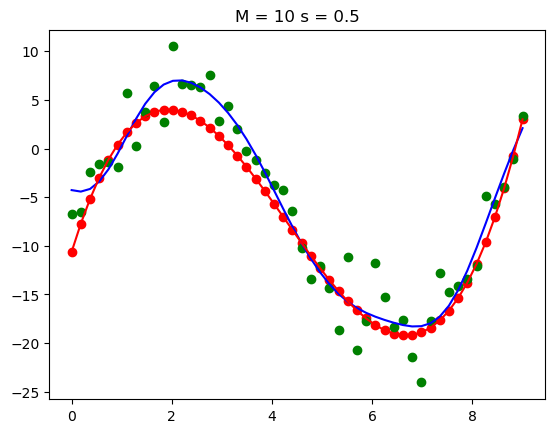

error= 256.19965895766137


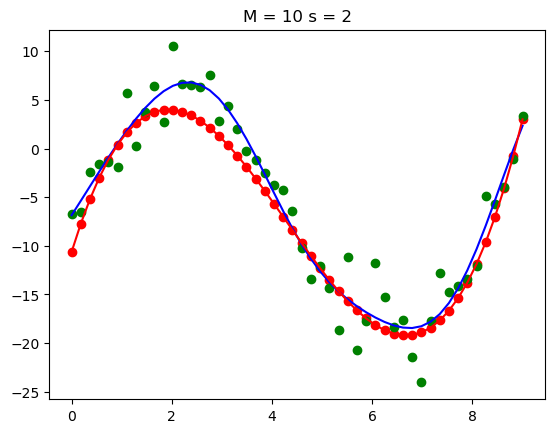

error= 183.70458015337655


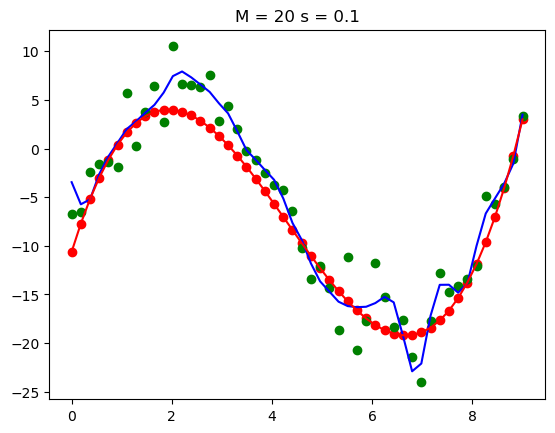

error= 164.72127168200362


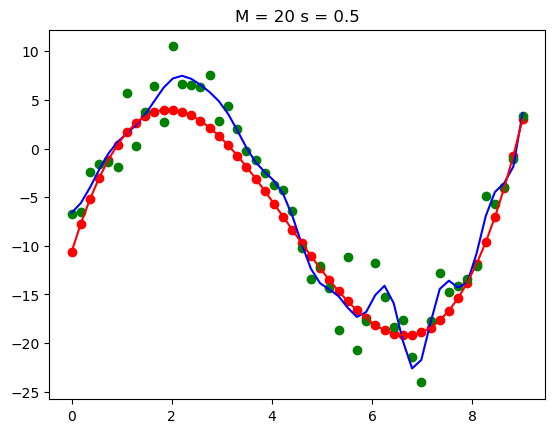

error= 472.4066889665128


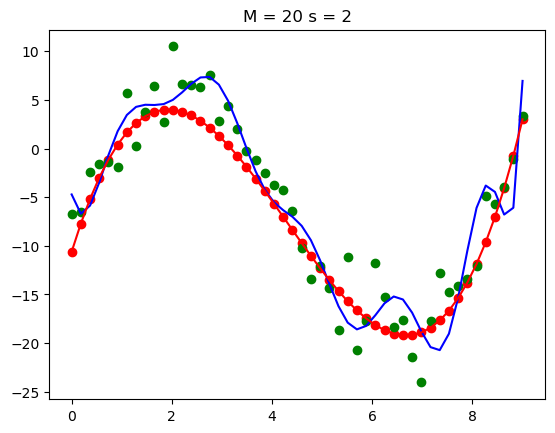

error= 1.4565792181260876e-19


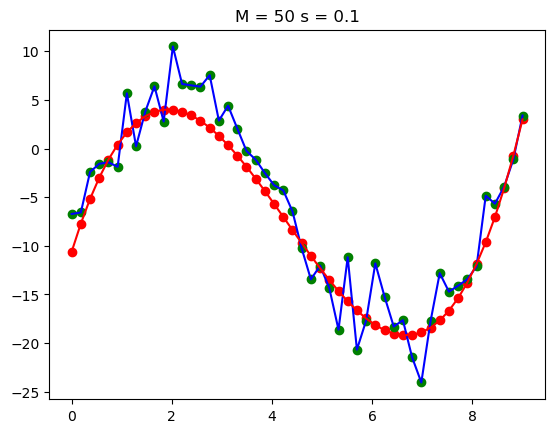

error= 193.20179506197013


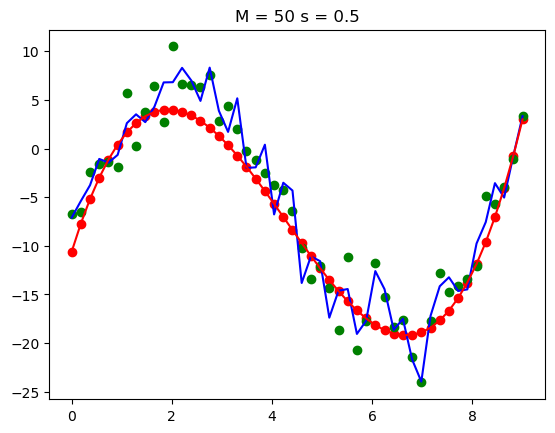

error= 242.42631499296365


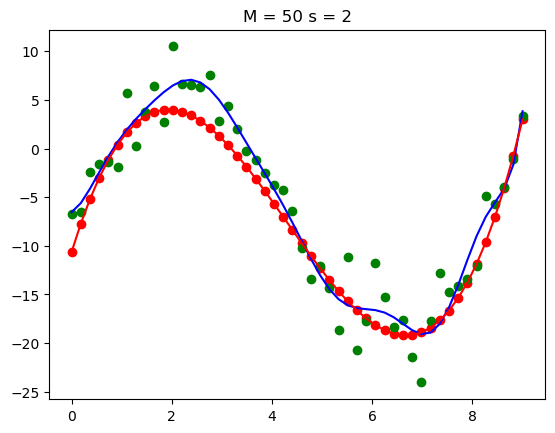

In [13]:
def fi_fun_sigmoid(x,m,sigma):
    # for each data point x, return the mx1 fi function matrix
    fi_m=np.zeros(m) # the return values is mx1 matrix
    #fi_m[0]=1
    mu=np.linspace(0,9,m) #the deviation of each sigmoid function distrubute evenly in the function domain
    for i in range(m):
        tem=(x-mu[i])/sigma
        fi_m[i]=1/(1+np.exp(-tem))
        pass
    return fi_m

for i in [5,10,20,50]:
    for j in [0.1,0.5,2]:
        Sigmoid_sigma=j
        fi=get_fi_sigmoid(xn,i,Sigmoid_sigma)
        w=get_MLE_basis_fitting(fi,tn_noise)
        plot_MLE_sigmoid_curve(fi,w)
        pass
    

### Use Gaussion basis function

error= 2555.956059716642


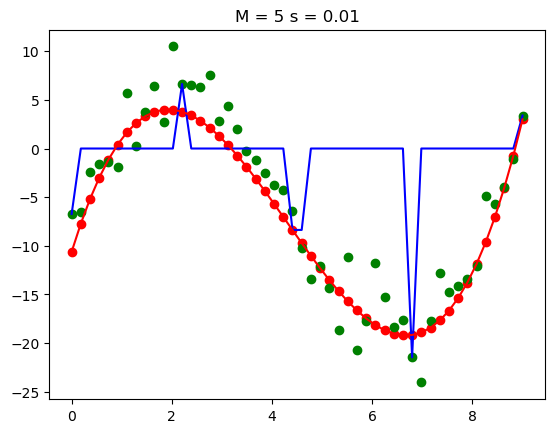

error= 2346.089091563108


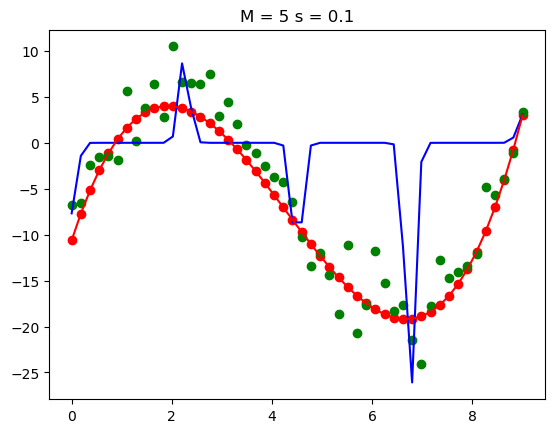

error= 787.3761639720689


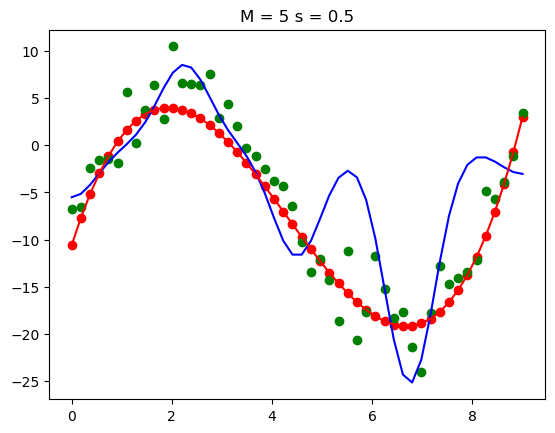

error= 161.386910484489


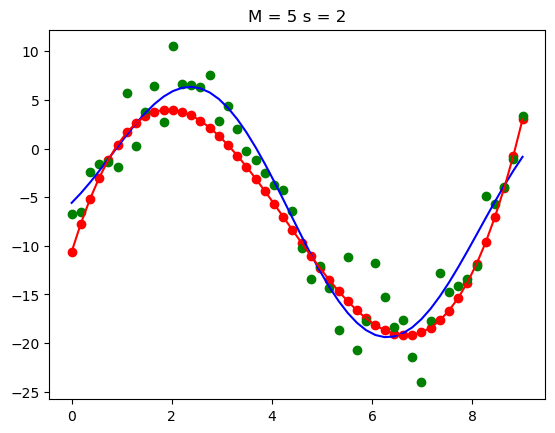

error= 2305.6445412144567


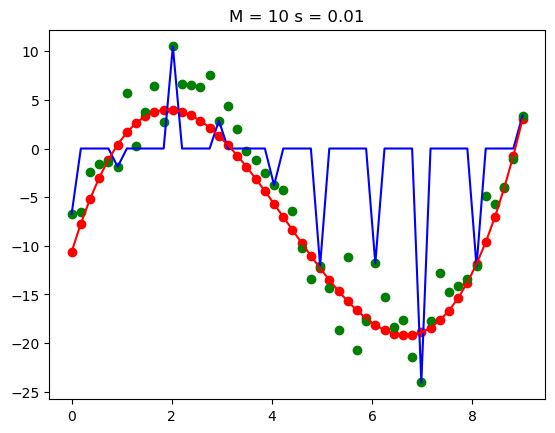

error= 1797.5299232577436


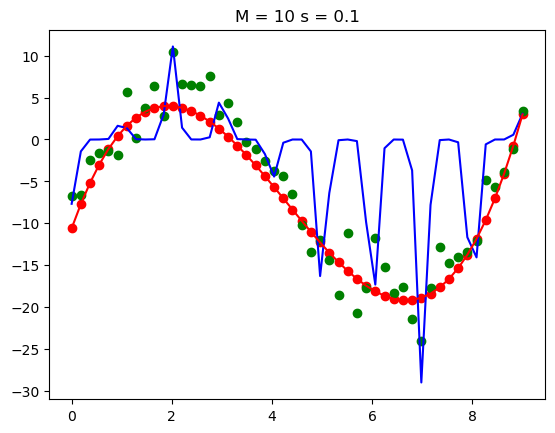

error= 116.86192636563321


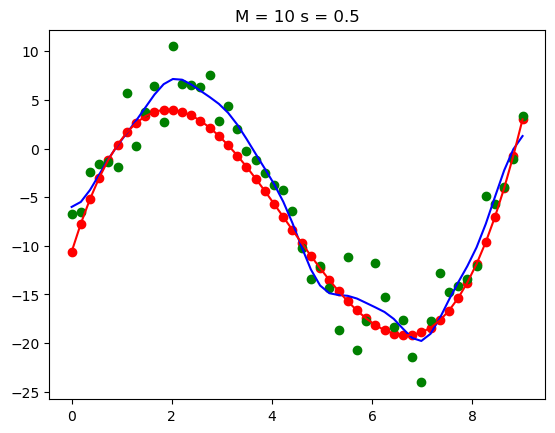

error= 128.02113368621306


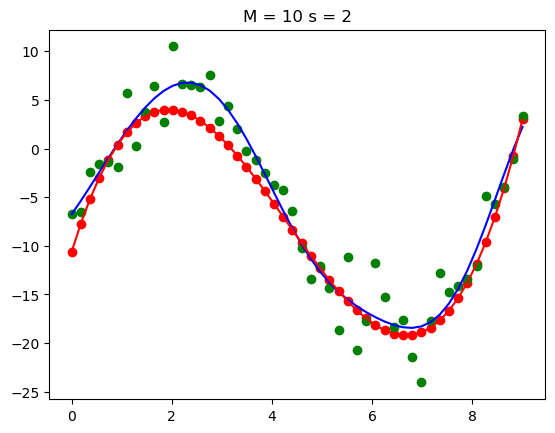

error= 1766.652507447572


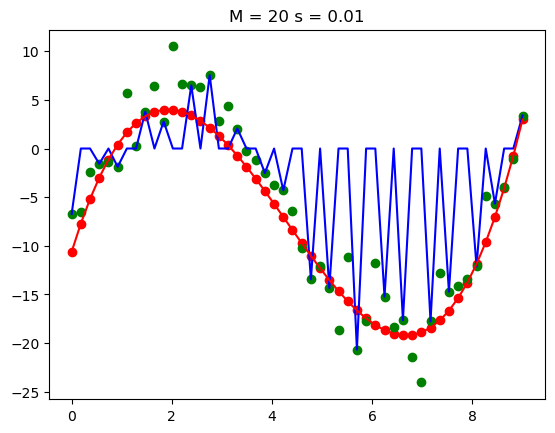

error= 773.2810271485515


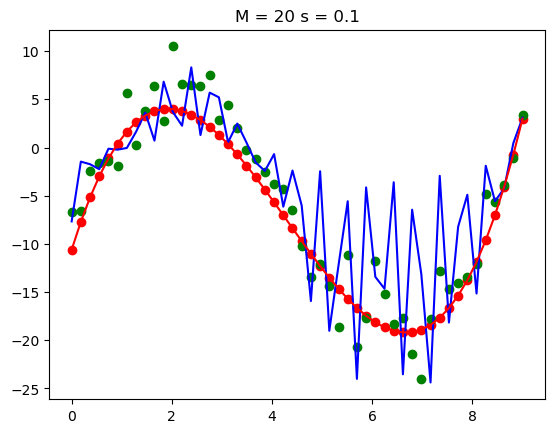

error= 92.35624695049293


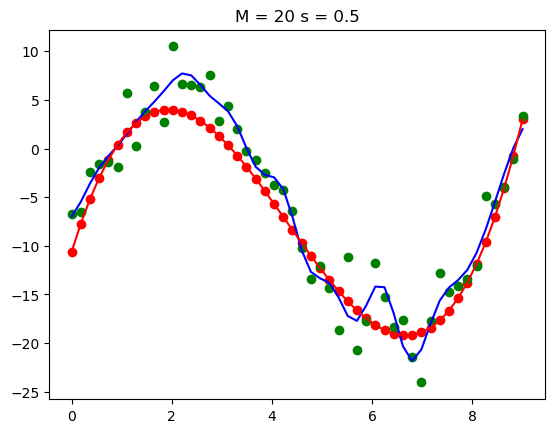

error= 118.22263342826214


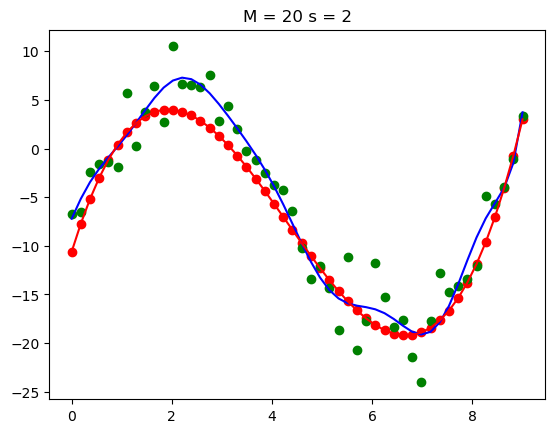

error= 0.0


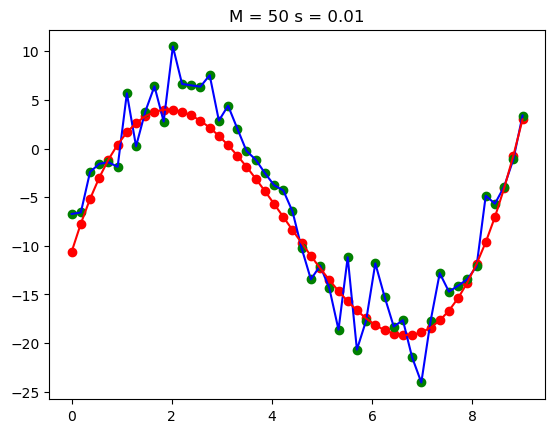

error= 1.7631657529271818e-28


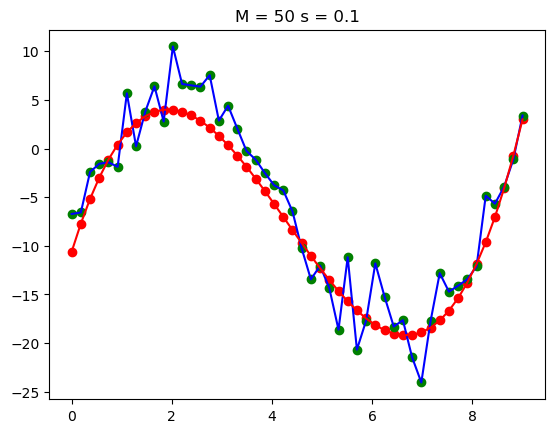

error= 35.5946006311084


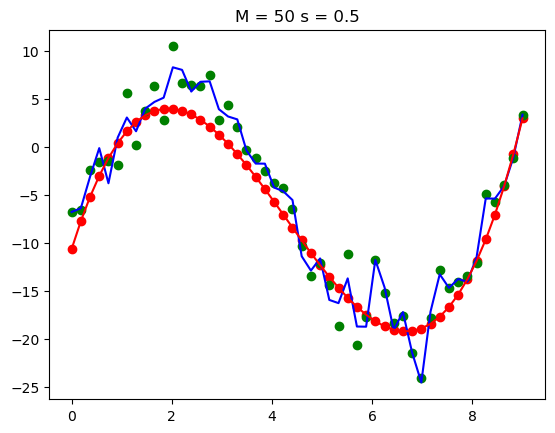

error= 117.97920304216858


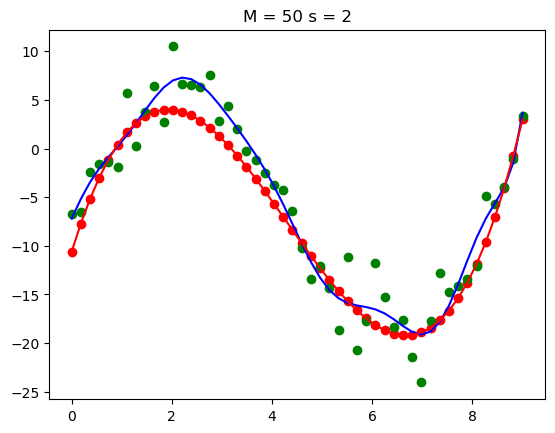

In [14]:
def fi_fun_gauss(x,m,sigma):
    # for each data point x, return the mx1 fi function matrix
    fi_m=np.zeros(m) # the return values is mx1 matrix
    #fi_m[0]=1
    mu=np.linspace(0,9,m) #the deviation of each gaussian function distrubute evenly in the function domain
    for i in range(m):
        fi_m[i]=np.exp(-1*(x-mu[i])**2/(2*(sigma**2)))
        pass
    return fi_m

for i in [5,10,20,50]:
    for j in [0.01,0.1,0.5,2]:
        Gauss_sigma=j
        fi=get_fi_gauss(xn,i,Gauss_sigma)
        w=get_MLE_basis_fitting(fi,tn_noise)
        plot_MLE_gauss_curve(fi,w)

### <font color="#dd00dd">discuss the advantages of these basis functions over polynomial functions
</font><br />
### In conclusion, with a proper choose of the parameters (means and deviations) for Gaussion and Sigmoid basis function fitting, it can solve the overfitting problem(or model complexity selecting problem). 
### When the mode complexity M is large, compared to the polynomial fitting, using basis function is a more suitable choose since the algorith time complexity and the error cause by noise does not increase significantly like polynomial function does. For example, for M=100, the polynomial fitting will calculate x^99 which could lead to significant error and is time-consuming. While using basis function fitting, it just have 100 function (Gaussion or Sigmoid) uniformly distrubuted in the area.

# Part 3  FULL BAYESIAN + PREDICTIVE DISTRIBUTION

399.99999999999994


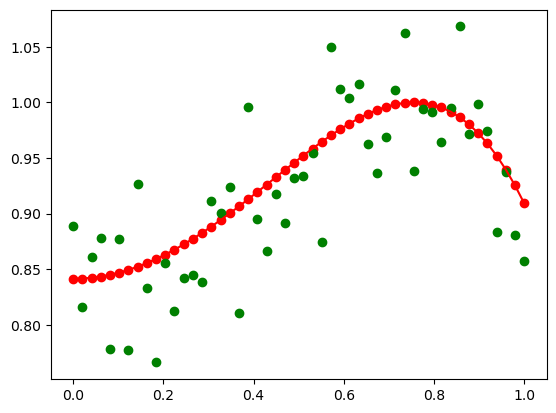

In [15]:
xn,tn=generate_data()

#determine the noise parameter, Beta and Alpha
Alpha=0.4
noise_sigma=0.05
Beta=np.power(noise_sigma,-2) 
print(Beta)
tn_noise=add_noise(tn,0,noise_sigma)
plt.plot(xn,tn,'r') #original curve in red line
plt.scatter(xn,tn,color='r') #original data points in red
plt.scatter(xn,tn_noise,color='g') # data points with noise in green
plt.show()

### <font color="#dd00dd">2. Compute w based on the full Bayesian inference (by using basis functions like discussed in class). Display the estimated values of w.
</font><br />
### Write the function to realize full Bayesian inference using gaussion basis function

estimated value of w is:
[ 1.12943883 -0.63755063  0.19672899  0.63106512 -0.08015583  0.14042386
  0.49397052  0.03508165  0.13759778  0.58552565]
estimated value of Sn is:
[[ 0.17709571 -0.36310061  0.30254282 -0.05778403 -0.11059715  0.08879393
   0.01351592 -0.0590767   0.0349741  -0.00563395]
 [-0.36310061  0.8184088  -0.81003152  0.32747785  0.13414527 -0.22146649
   0.04078657  0.10970962 -0.10555706  0.0349741 ]
 [ 0.30254282 -0.81003152  1.04044353 -0.74362649  0.19039293  0.16347119
  -0.15221935 -0.02465022  0.10970962 -0.0590767 ]
 [-0.05778403  0.32747785 -0.74362649  0.95716707 -0.72785447  0.23824482
   0.11301399 -0.15221935  0.04078657  0.01351592]
 [-0.11059715  0.13414527  0.19039293 -0.72785447  1.01530735 -0.77918946
   0.23824482  0.16347119 -0.22146649  0.08879393]
 [ 0.08879393 -0.22146649  0.16347119  0.23824482 -0.77918946  1.01530735
  -0.72785447  0.19039293  0.13414527 -0.11059715]
 [ 0.01351592  0.04078657 -0.15221935  0.11301399  0.23824482 -0.72785447
  

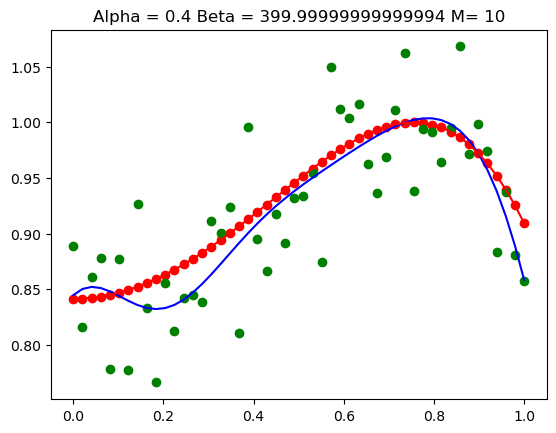

In [16]:
# the get fi function is same as before
def fi_fun_gauss(x,m,sigma):
    # for each data point x, return the mx1 fi function matrix
    fi_m=np.zeros(m) # the return values is mx1 matrix
    #fi_m[0]=1
    mu=np.linspace(0,1,m) #the deviation of each gaussian function distrubute evenly in the function domain
    for i in range(m):
        fi_m[i]=np.exp(-1*(x-mu[i])**2/(2*(sigma**2)))
        pass
    return fi_m
    

def get_fi_gauss(xn,m,sigma):
    n=len(xn) # number of the data points
    fi_nm=np.zeros((n,m))
    for i in range(n):
        fi_nm[i][:]=fi_fun_gauss(xn[i],m,sigma)
    return fi_nm

# full Bayesian inference return with Mn and Sn

def get_full_Bayesian_gauss_fitting(fi,tn,alpha,beta):
    m=fi.shape[1]
    tem=beta*np.dot(fi.T,fi)+alpha*np.identity(m)
    Sn=np.linalg.solve(tem,np.identity(m))
    tem2=beta*np.dot(fi.T,tn)
    Mn=np.linalg.solve(tem,tem2)
    return Mn,Sn
    
def plot_full_Bayesian_gauss_curve(fi,w):
    m=len(w)
    yn=np.dot(fi,w)
    plt.plot(xn,yn,'b')
    plt.plot(xn,tn,'r') #original curve in red line
    plt.scatter(xn,tn,color='r') #original data points in red
    plt.scatter(xn,tn_noise,color='g') # data points with noise in green
    plt.title("Alpha = "+str(Alpha)+" Beta = "+str(Beta)+" M= "+str(m))
    Error=np.sum(np.square(yn-tn_noise))
    #print(f"error=",Error)
    plt.show()
    pass
# fit with mode complexity M=10 and deviation s=0.2
fi=get_fi_gauss(xn,10,0.2)
Mn,Sn=get_full_Bayesian_gauss_fitting(fi,tn_noise,alpha=Alpha,beta=Beta)
print("estimated value of w is:\n"+str(Mn))
print("estimated value of Sn is:\n"+str(Sn))
plot_full_Bayesian_gauss_curve(fi,Mn)

### <font color="#dd00dd">3. Experiment with your code by changing alpha and beta.
</font><br />

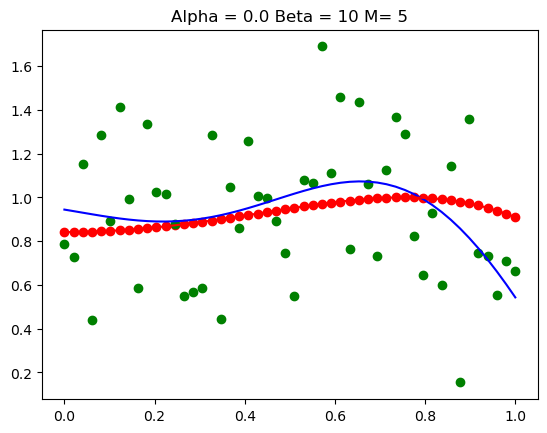

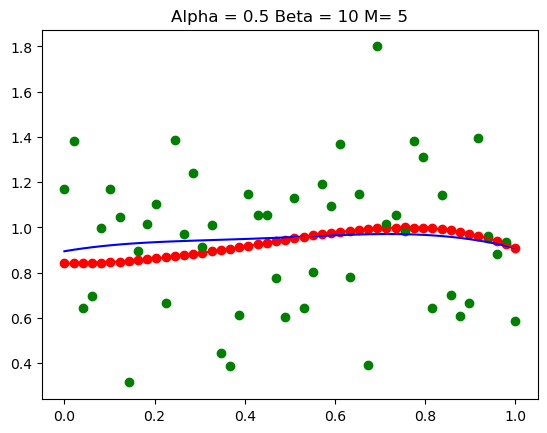

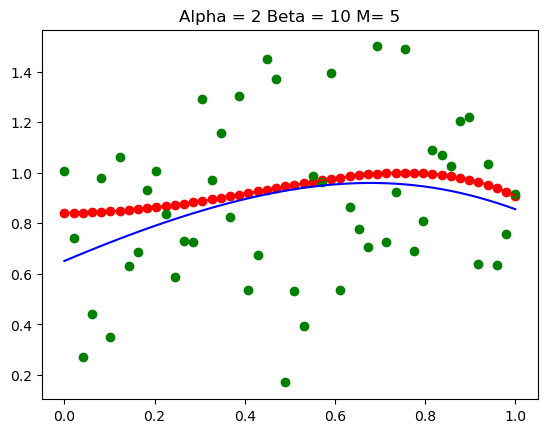

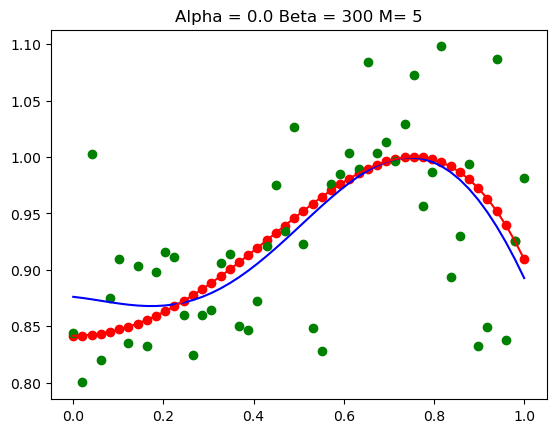

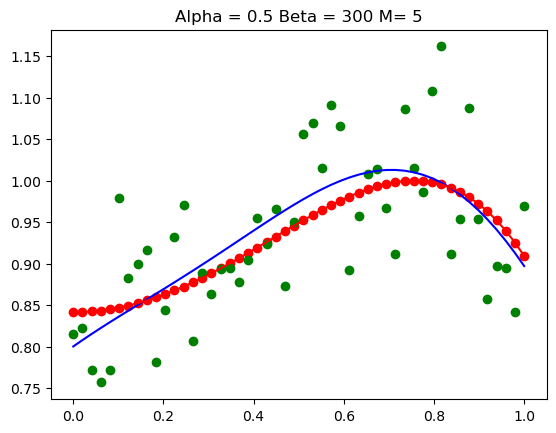

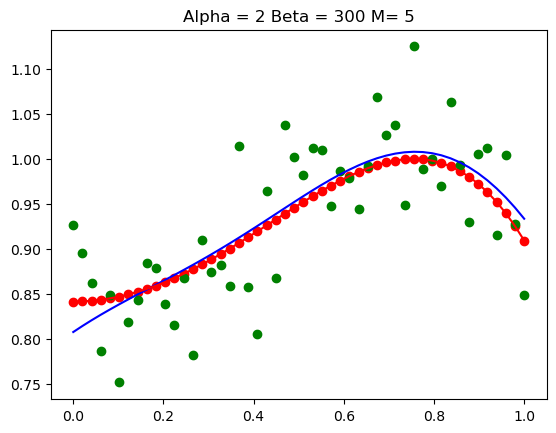

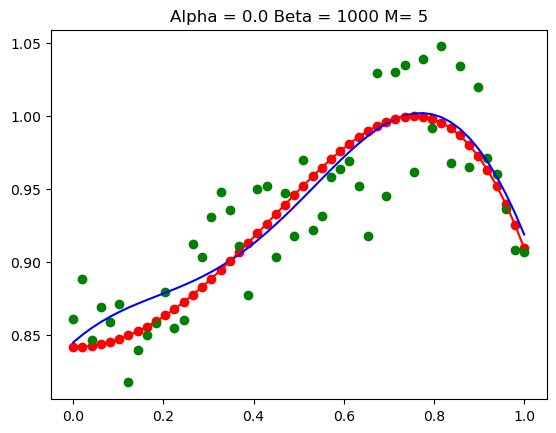

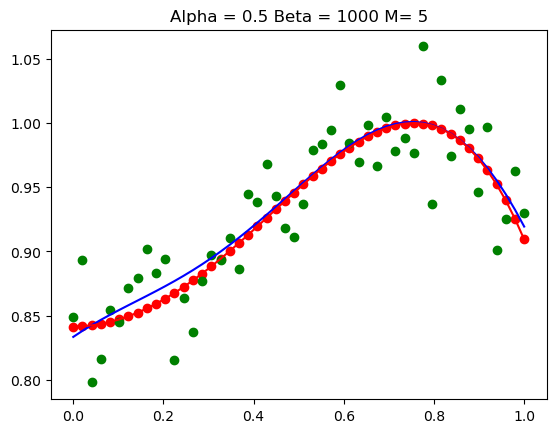

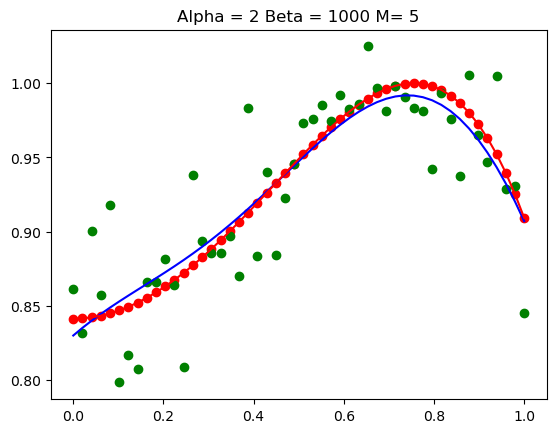

In [17]:
for i in [10,300,1000]:
    for j in [0.0,0.5,2]:
        Beta=i
        noise_sigma=np.sqrt(1/Beta)
        Alpha=j
        tn_noise=add_noise(tn,0,noise_sigma)
        fi=get_fi_gauss(xn,5,0.5)
        Mn,Sn=get_full_Bayesian_gauss_fitting(fi,tn_noise,alpha=Alpha,beta=Beta)
        plot_full_Bayesian_gauss_curve(fi,Mn)
        

### <font color="#dd00dd">Discuss the meaning of them with respect to the curve fitting results.
</font><br />
### Alpha is the variance for prior term P(w) and Beta is the variance for the likelihood term P(t|w).
### Alpha could ease the overfitting problem because it is our belief that we encourage the w to be centred at 0, so it makes the fitting performs well in the training stage. Beta represents the intensity of noise (large Beta represents low noise strength) or how distrubuted around the average value
### Show best fitting: one of them is Alpha=0.5 Beta=1000

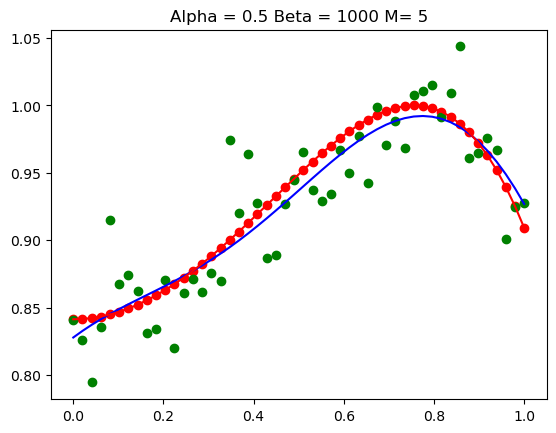

In [18]:
Beta=1000
noise_sigma=np.sqrt(1/Beta)
Alpha=0.5
mode_number=5
tn_noise=add_noise(tn,0,noise_sigma)
fi=get_fi_gauss(xn,mode_number,0.5)
Mn,Sn=get_full_Bayesian_gauss_fitting(fi,tn_noise,alpha=Alpha,beta=Beta)
plot_full_Bayesian_gauss_curve(fi,Mn)

### <font color="#dd00dd">5. Explain how useful p(w|t) for the training and testing stages;
</font><br />
### p(w|t) is the posterior term which represents the probability distribution for all w given the data tn and it shows that to what extend can we trust our calculated w by the parameter Mn and SSn. 
## Predictive distribution:

[]


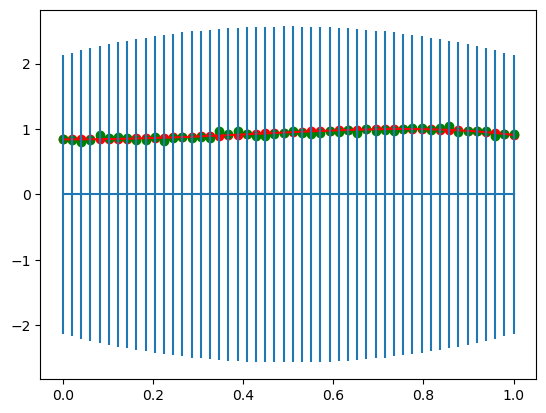

[4]


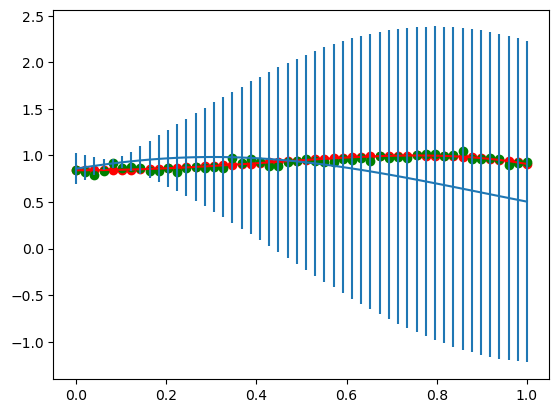

[ 4 24]


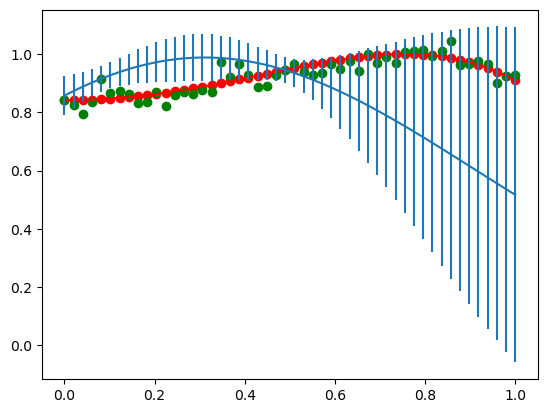

[ 4 24 11]


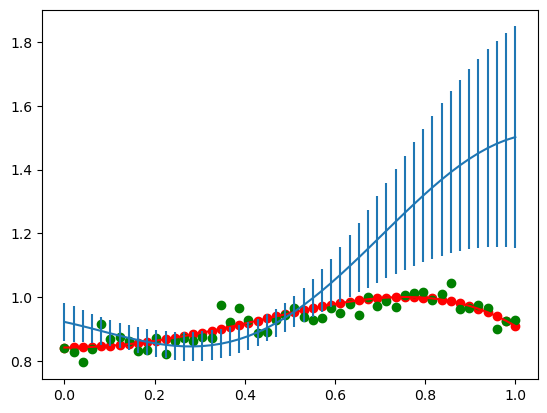

[ 4 24 11  5]


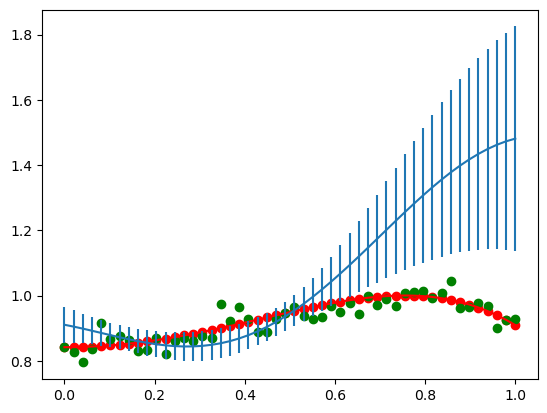

[ 4 24 11  5  7]


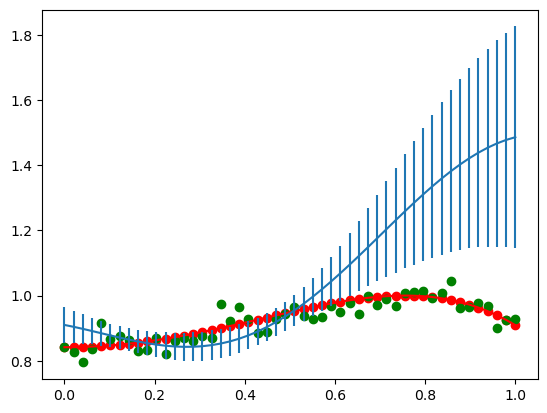

[ 4 24 11  5  7 44]


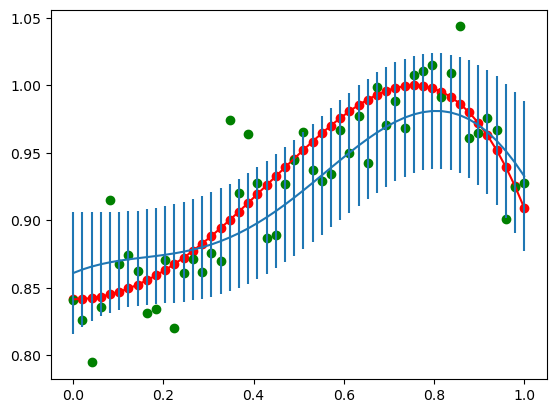

[ 4 24 11  5  7 44 32]


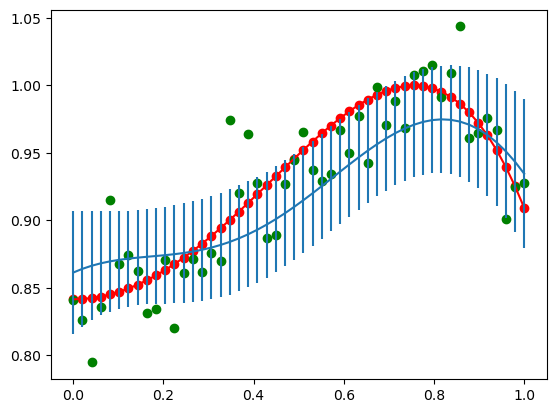

[ 4 24 11  5  7 44 32 17]


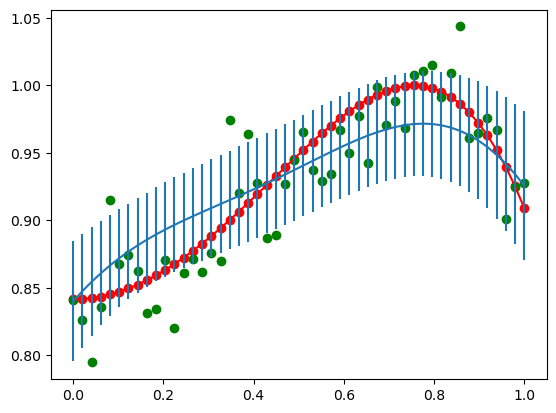

[ 4 24 11  5  7 44 32 17 41]


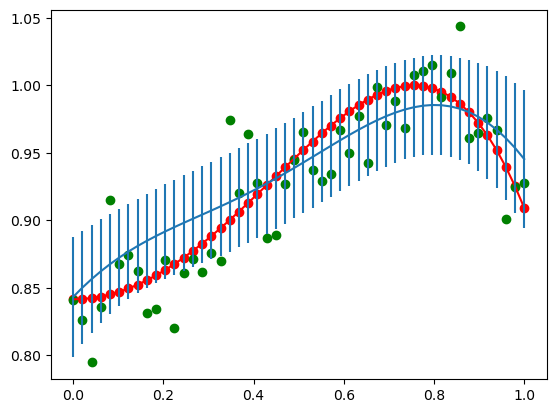

[ 4 24 11  5  7 44 32 17 41 28]


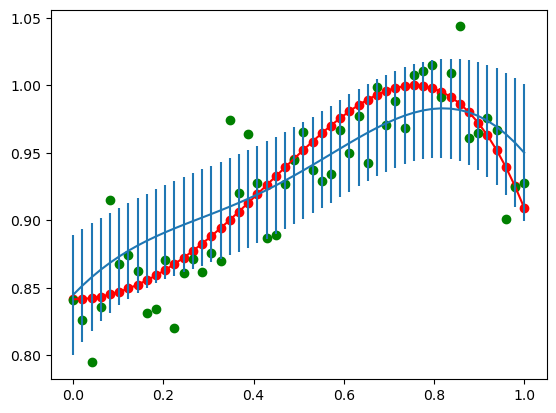

[ 4 24 11  5  7 44 32 17 41 28 27]


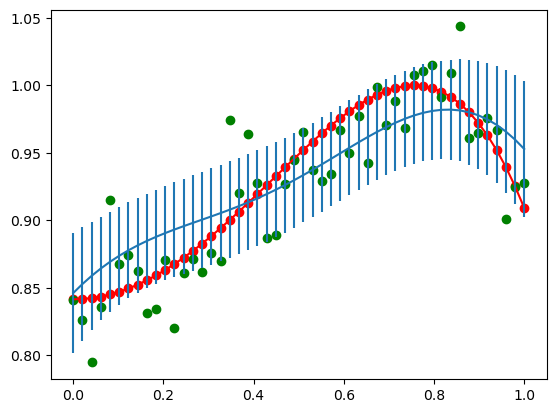

[ 4 24 11  5  7 44 32 17 41 28 27 46]


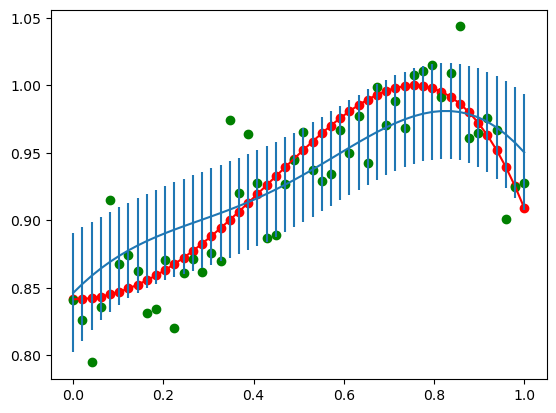

[ 4 24 11  5  7 44 32 17 41 28 27 46 21]


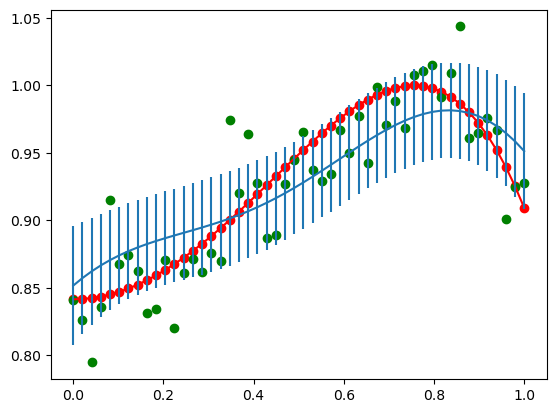

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45]


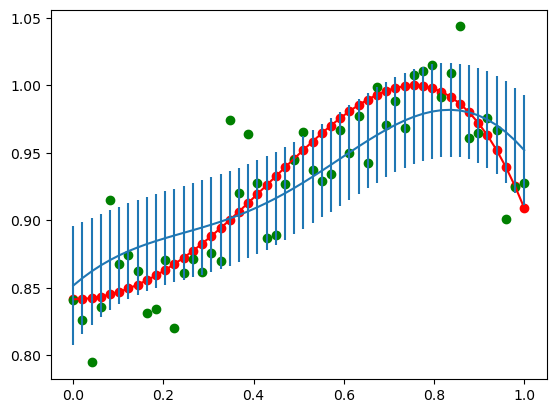

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8]


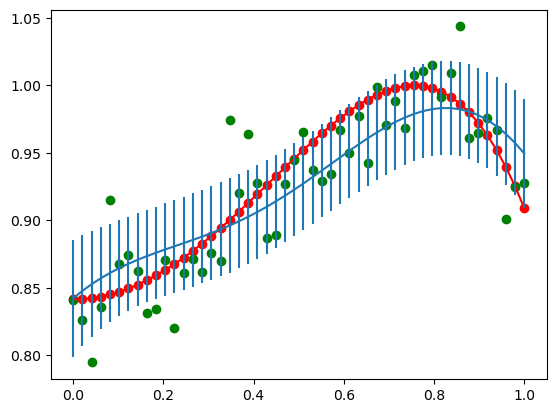

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15]


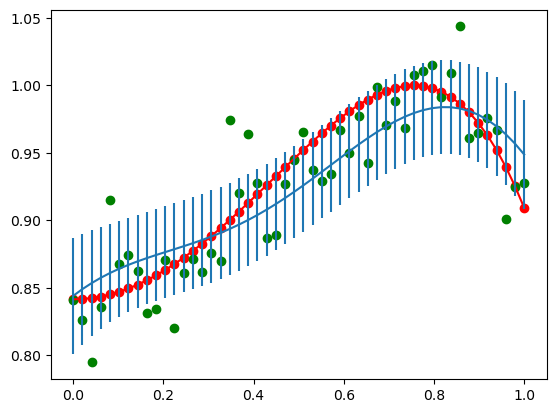

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36]


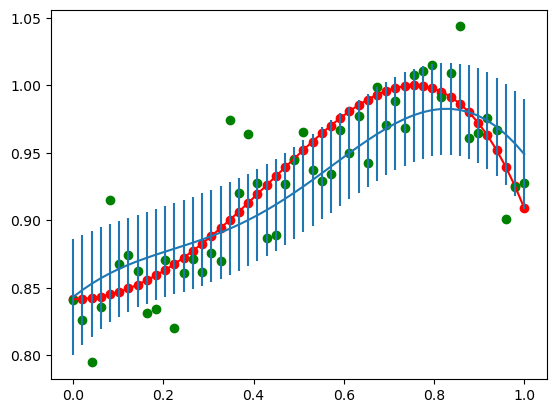

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25]


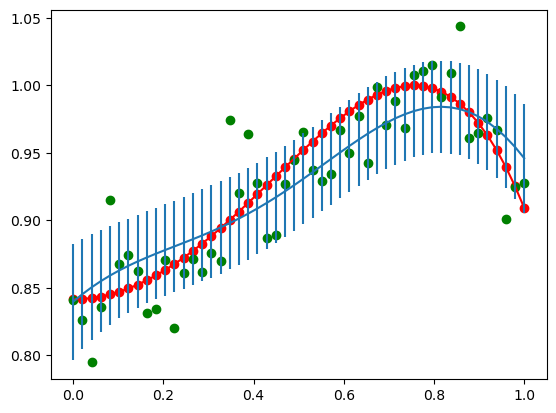

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34]


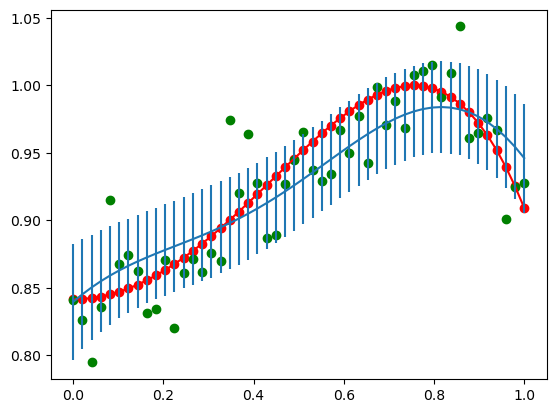

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2]


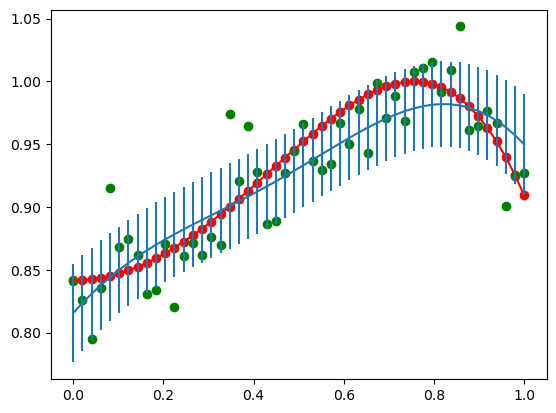

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31]


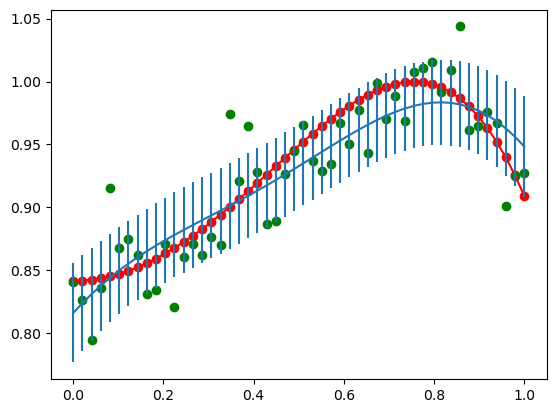

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26]


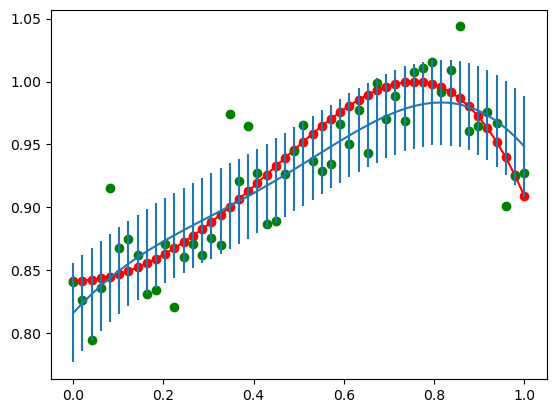

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1]


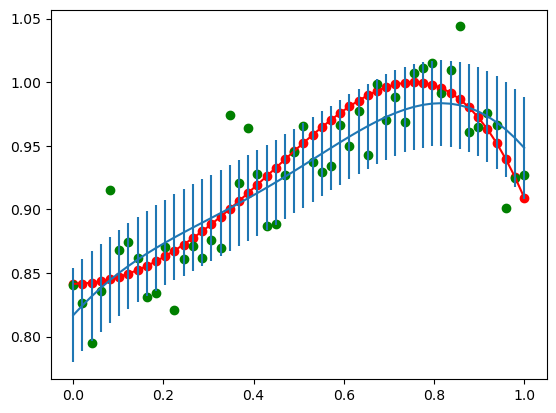

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22]


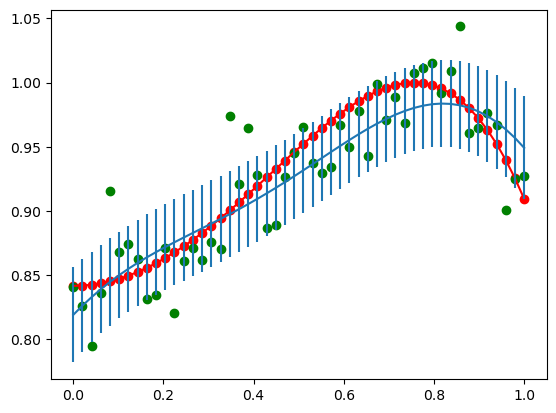

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14]


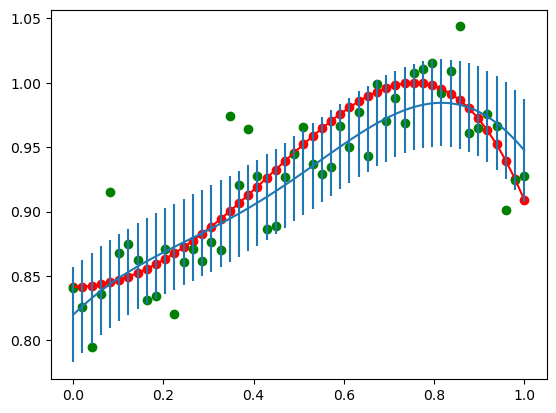

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16]


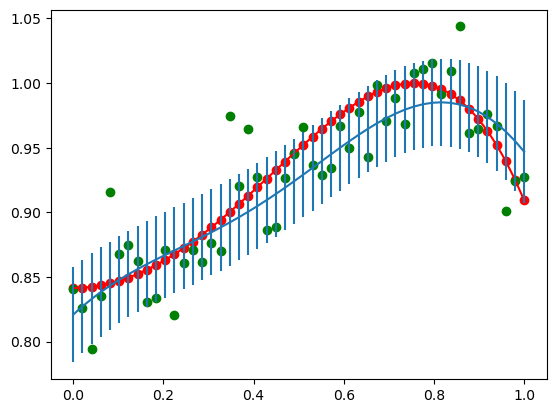

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43]


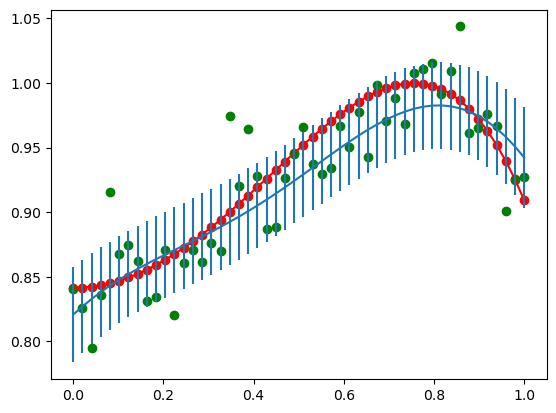

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18]


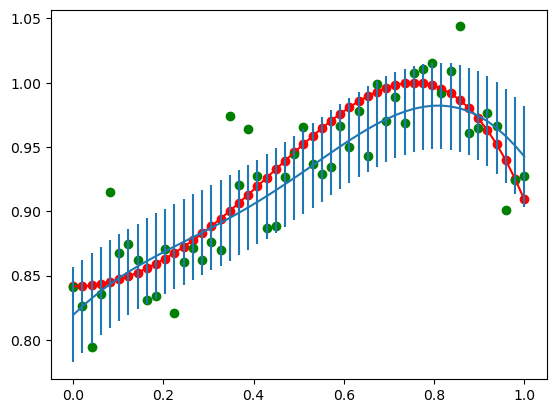

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42]


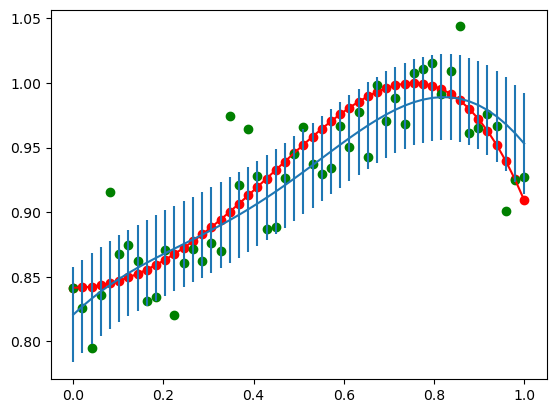

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33]


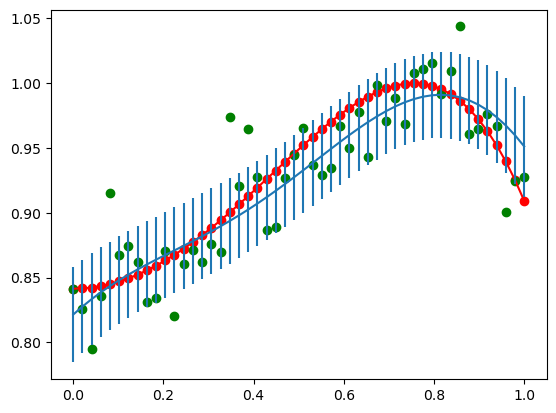

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23]


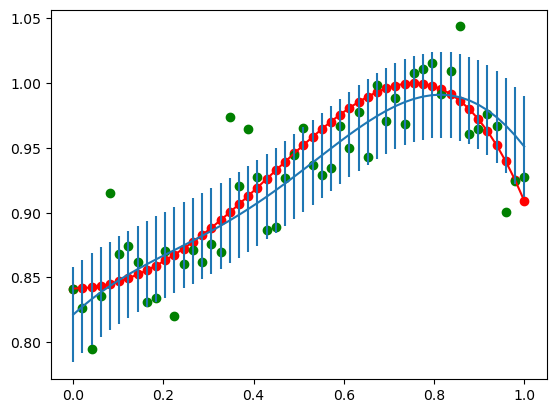

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48]


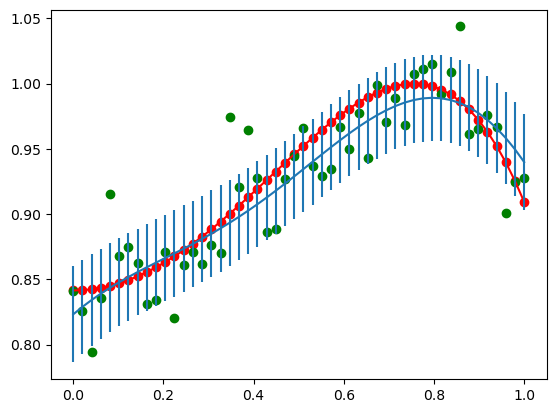

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3]


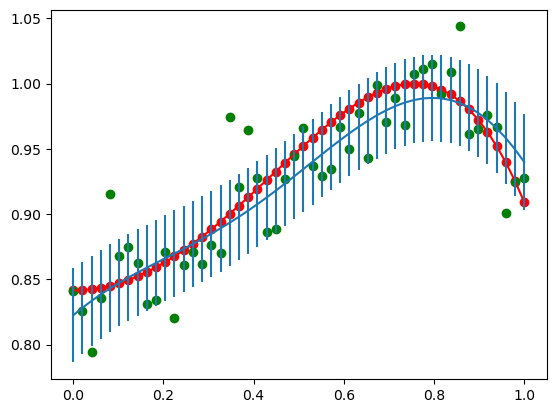

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29]


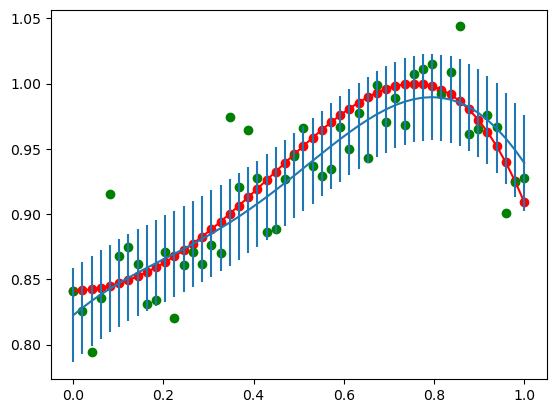

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30]


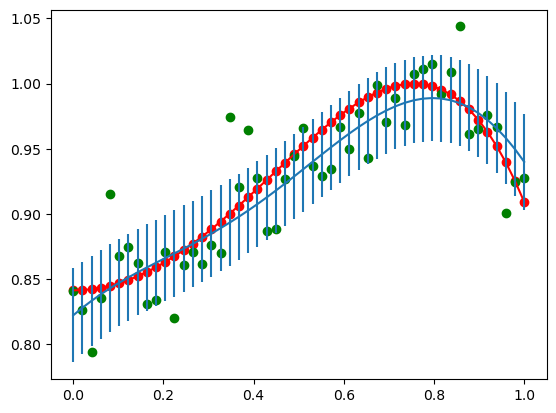

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35]


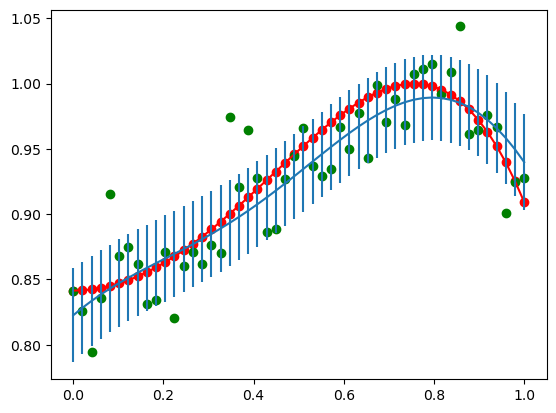

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37]


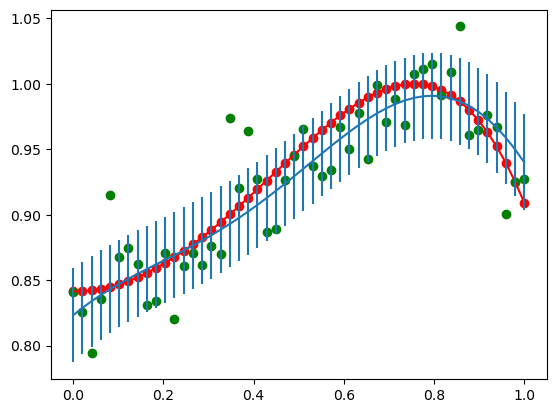

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37 20]


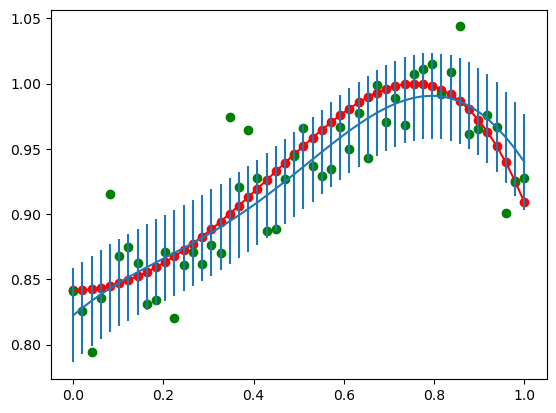

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37 20  6]


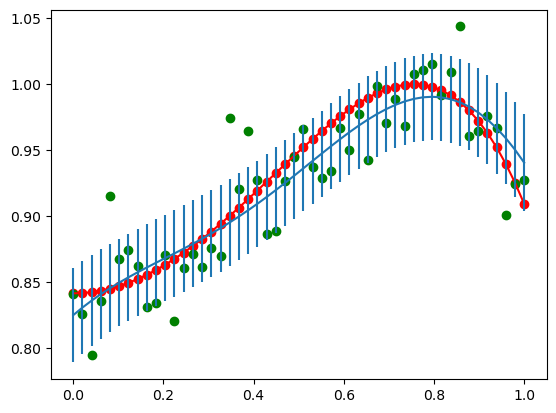

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37 20  6 49]


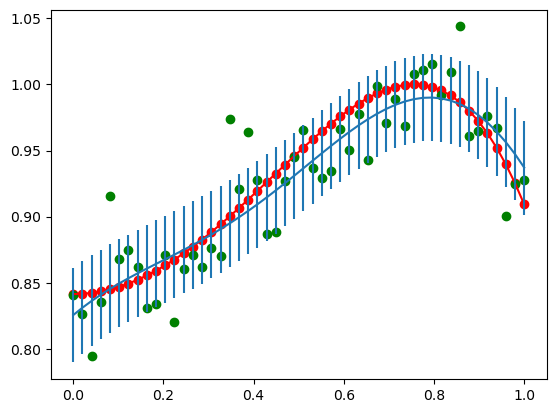

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37 20  6 49 13]


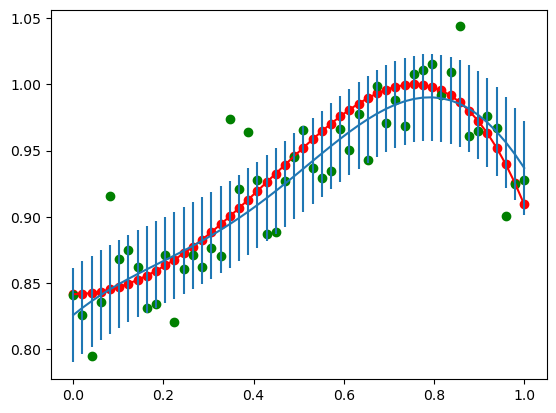

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37 20  6 49 13 19]


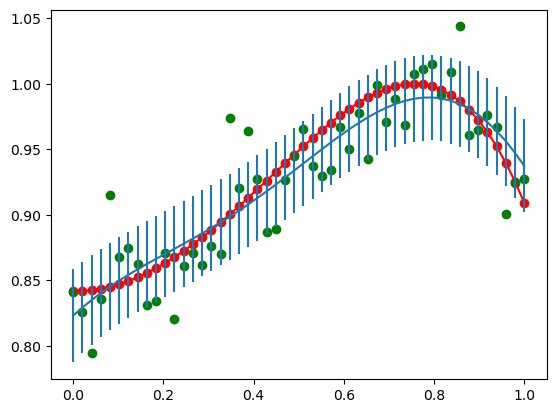

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37 20  6 49 13 19 12]


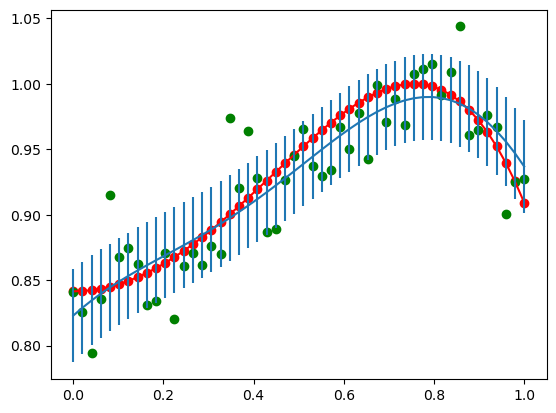

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37 20  6 49 13 19 12 10]


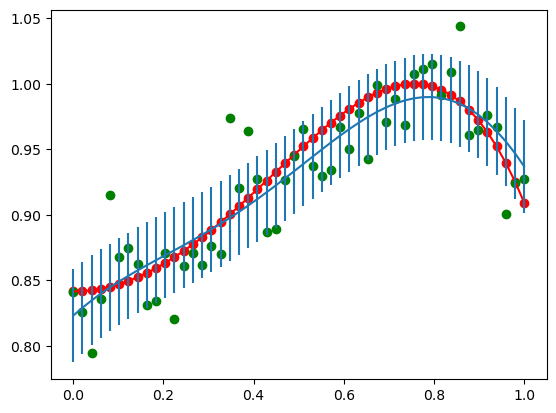

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37 20  6 49 13 19 12 10  0]


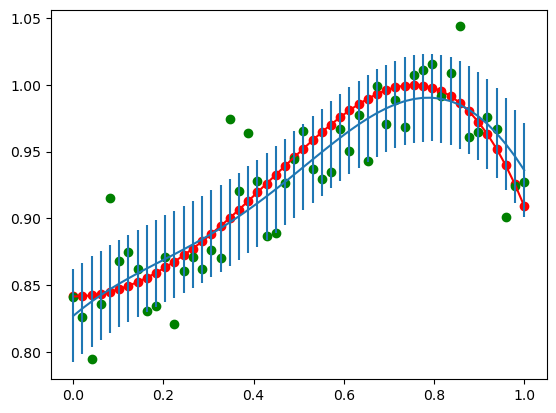

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37 20  6 49 13 19 12 10  0 40]


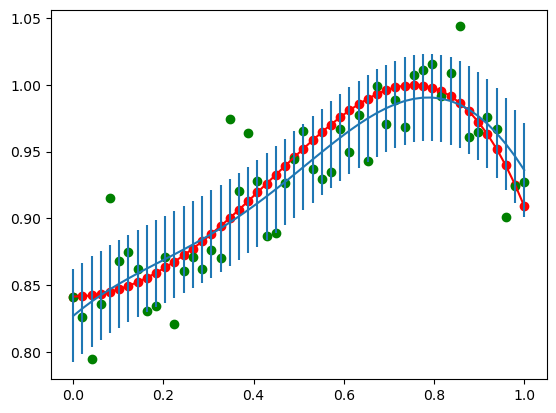

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37 20  6 49 13 19 12 10  0 40 38]


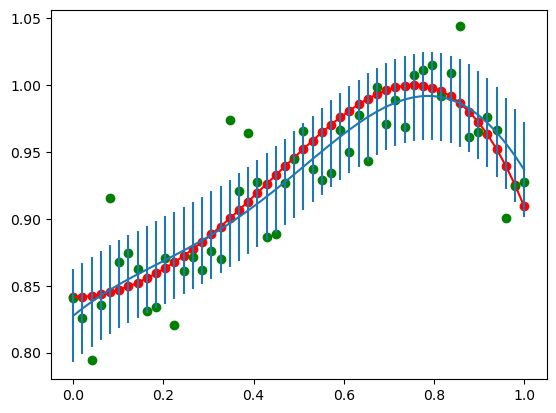

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37 20  6 49 13 19 12 10  0 40 38  9]


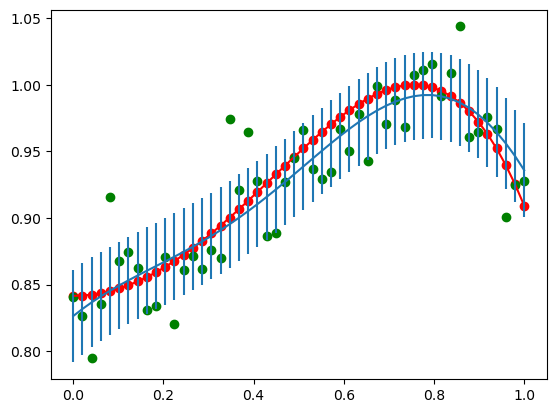

[ 4 24 11  5  7 44 32 17 41 28 27 46 21 45  8 15 36 25 34  2 31 26  1 22
 14 16 43 18 42 33 23 48  3 29 30 35 37 20  6 49 13 19 12 10  0 40 38  9
 39]


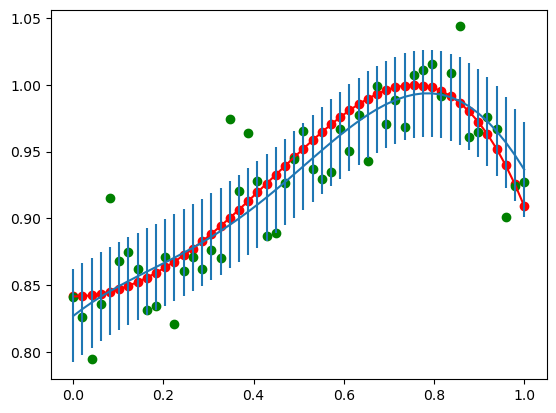

In [19]:
def selective_x(x,t,m): # for selected Xn and tn, calculate the Mn Sn for them
    fi=get_fi_gauss(x,m,0.5) # NxM
    Mn,Sn=get_full_Bayesian_gauss_fitting(fi,t,alpha=Alpha,beta=Beta)
    return Mn,Sn

def predictive_dis(Mn,Sn,m,beta): # Given the Mn and Sn, we can calculate the Mnn and SSnn for each data point
    ## Mn: Mx1 
    Mnn=np.zeros(50)
    SSnn=np.zeros(50)  
    for i in range(50):
        fi=fi_fun_gauss(xn[i],m,0.5).reshape(m,1)
        Mnn[i]=np.dot(Mn.T,fi)
        SSnn[i]=1/beta+np.dot(np.dot(fi.T,Sn),fi)
        pass
    #print(np.sqrt(SSnn))
    return Mnn,SSnn

def random_select(xn,tn,list): # randomly select data from the data set
    np.random.shuffle(list)
    xn_new=np.zeros(50)
    tn_new=np.zeros(50)
    for i in range(50):
        xn_new[i]=xn[list[i]]
        tn_new[i]=tn[list[i]]
        pass
    return xn_new,tn_new
    
def plot_predictive_dis(): # plot the predictive distrubution as the data point reach sequentially
    list=np.arange(50)
    xn_new,tn_new=random_select(xn,tn_noise,list)
    for i in range(50):
        Mn,Sn=selective_x(xn_new[:i],tn_new[:i],5)
        Mnn,SSnn=predictive_dis(Mn,Sn,mode_number,Beta)
        print(list[:i])
        plt.plot(xn,tn,'r') #original curve in red line
        plt.scatter(xn,tn,color='r') #original data points in red
        plt.scatter(xn,tn_noise,color='g') # data points with noise in green
        plt.errorbar(xn,Mnn,np.sqrt(SSnn)) # the plot should looks into the standard deviation which is the square root of SSn
        plt.show()
        pass
plot_predictive_dis()

### <font color="#dd00dd">8. Explain why the predictive distribution is better than the original form of the full Bayesian inference:</font><br />
### The predictive distribution is better than the full Bayesian inference because it gives the probablity distribution of where the data value is, or to say the area that this data value is in. Hence, it gives the predition of the data value and we know exactly what is the probability.
### <font color="#dd00dd">9. Discuss the differences between p(t_new|t) and p(w|t):</font><br />
### p(w|t) is that in the training stage, if the imformation of data tn is given, the probability of model parameter w. So p(w|t) is a measure how can we choose the desired value of w. 
### p(t_new|t) is about the sequential learning. It is that if the previous data tn is given, based on the optimal model parameter w, the probability distrubution of this new data tn_new. Hence, it is a measure that with all known data tn, the prediction of the new data point tn_new. In the last prediction result, if the known information tn is large, it will give a more accurate prediction or to say a narrower prediciton range

# Part 4 CLASSIFICATION

### <font color="#dd00dd">Based on the code above, generate data 
</font><br />

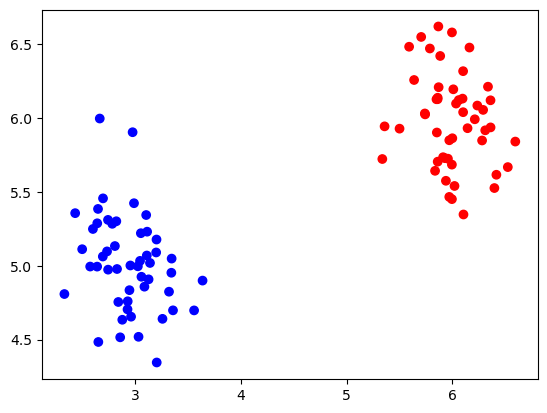

In [20]:
%matplotlib inline
N1=50
N2=50
K=2
sigma=0.1

mean=(6,6)
cov=[[sigma,0],[0,sigma]]
X1=np.random.multivariate_normal(mean,cov,N1)
c1=['red']*len(X1)

mean=(3,5)
cov=[[sigma,0],[0,sigma]]
X2=np.random.multivariate_normal(mean,cov,N2)
c2=['blue']*len(X2)

#outlier:
mean=(8,6)
cov=[[sigma,0],[0,sigma]]
X3=np.random.multivariate_normal(mean,cov,int(np.floor(N2)))
c3=['blue']*len(X3)

X=np.concatenate((X1,X2))
#X=np.concatenate((X,X3))
color=np.concatenate((c1,c2))
#color=np.concatenate((color,c3))

T=np.zeros((100,1))
for n in range(0,len(X)):
    if(n<len(X1)):
        T[n]=0
        pass
    if(n>=len(X1) and n<len(X1)+len(X2)):
        T[n]=1
        pass
    pass
plt.scatter(X[:,0],X[:,1],marker='o',c=color)
plt.show()

### <font color="#dd00dd">3. Implement the MAP for classification, so that using the above data as training, we can generate a classifier in the basis function space (a space with higher dimensionality). Show the first and second bases
</font><br /> 

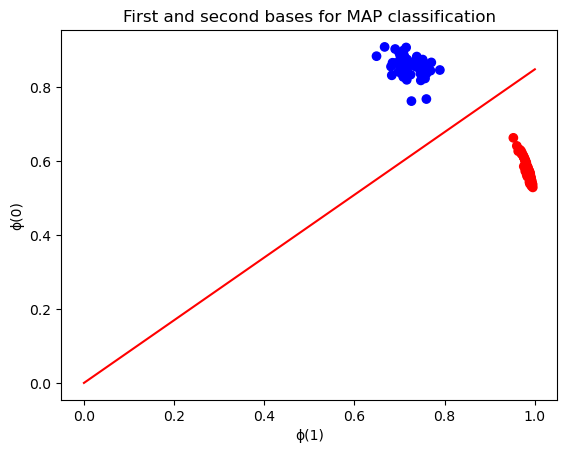

In [21]:
# parameters of the model
m=2
Alpha=1
gauss_sigma=5
SS0_inv=np.linalg.solve(Alpha*np.identity(m),np.identity(m)) # value of inverted SS0 

def get_fi_m(X,index,m,sigma): # for one input data point get fi
    n=len(X)
    fi_m=np.zeros((m,1))
    mu=np.linspace(np.min(X),np.max(X),m)
    for i in range(m):
        tem1=(X[index][0]-mu[i])**2
        tem2=(X[index][1]-mu[i])**2
        #tmp=
        fi_m[i][0]=np.exp(-1*(tem1+tem2)/(2*(sigma**2)))
        
    return fi_m
    pass

def get_fi(X,m,sigma): # for all data in X, return fi (nxm martrix)
    n=len(X)
    fi=np.zeros((n,m))
    for i in range(n):
        fi[i][:]=get_fi_m(X,i,m,sigma).T
        pass
    return fi

def get_R_and_sigma_matrix(fi,w): # based on fi and w, return the sigmoid parameter sigma(prediction) and the Rnn matrix (nxn)
    n=fi.shape[0]
    RR=np.zeros((n,n))
    sigma=np.zeros((n,1))
    for i in range(n):
        a=np.dot(w.T,fi[i][:].T)
        sigma[i]=1/(1+np.exp(-1*a))
        RR[i][i]=sigma[i]*(1-sigma[i])
    return RR,sigma


def estimate_w(fi,sigma,w_init,time): # start from initial guess w_inti, use Newtons method to update w_new
    w=w_init
    w_new=np.zeros((m,1))
    for i in range(time):
        RR,sigma=get_R_and_sigma_matrix(fi,w)
        Gradient=np.dot(SS0_inv,w)+np.dot(fi.T,sigma-T)
        Hessian=SS0_inv+np.dot(np.dot(fi.T,RR),fi)
        Hessian_inv=np.linalg.solve(Hessian,np.identity(m))
        w_new=w-np.dot(Hessian_inv,Gradient)
        
        
    return w_new

# get fi matrix and w_init
fi=get_fi(X,m,gauss_sigma)
w_init=np.zeros((m,1))
#iterate for 1000 times

w=estimate_w(fi,sigma,w_init,1000) 
RR,prediction=get_R_and_sigma_matrix(fi,w) # there sigma is the prediction (0-1)

#print(prediction)
point=np.linspace(0,1,20)
plt.scatter(fi[:,1],fi[:,0],marker='o',c=color) # plot first 2 bases
plt.plot(point,-1*w[1]/w[0]*point, color = 'red', label = 'x=y') # plot for the seperate line
plt.xlabel("ϕ(1)")
plt.ylabel("ϕ(0)")
plt.title("First and second bases for MAP classification")
plt.show()

### As it shows, when the dimention is only increased to 2, it can easily distinguish the type of data based on the values of ϕ(0) and ϕ(1)

### <font color="#dd00dd">4. In the testing stage, use any other locations in the original space (in the original space with low dimensionality, in the range of 0 to 10) as the test data, and plot the predicted labels (whose values between 0 to 1) in colors
</font><br /> 

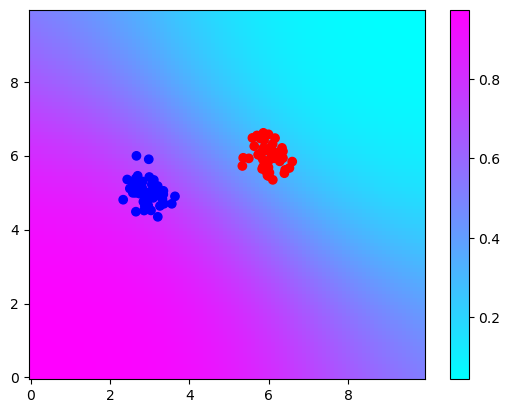

In [22]:
dx, dy = 0.1,0.1
y, x = np.mgrid[slice(0, 10 , dy), 
                slice(0, 10 , dx)] 
count=0

XX=np.zeros((10000,2))
for i in range(x.shape[0]):
    for j in range(x.shape[1]):
        XX[count][0]=x[i][j]
        XX[count][1]=y[i][j]
        count=count+1
    pass
fi=get_fi(XX,m,gauss_sigma)
RR,z=get_R_and_sigma_matrix(fi,w)

z_min=np.min(z)
z_max=np.max(z)
     
c = plt.pcolormesh(x, y, z.reshape(100,100), cmap ='cool', vmin = z_min, vmax = z_max,) 
plt.colorbar(c)
plt.scatter(X[:,0],X[:,1],marker='o',c=color)
plt.show()